In [2]:
import numpy as np
import pandas as pd
import time
import datetime

import warnings
warnings.filterwarnings(action='ignore')

---

### 1 품목별 집계
##### Read Data

In [3]:
# 동부적환장(19)
data01 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre1/동부적환장(19)_pre1.csv',encoding='ANSI')
df01 = pd.DataFrame(data01)
df01.head(5)

,1차 계량일,순번,2차계량일,1차시간,2차시간,차량번호숫자,거래처,품명,소속회사,공차중량,총중량,실중량,입/출고
0,2019-01-02,1,2019-01-02,9:23,9:25,8544,병점2동,폐합성,화성시청,2210,2190,20,입고
1,2019-01-02,2,2019-01-02,9:53,10:01,1119,(주)부경크린,폐합성,반입업체,2390,2020,370,입고
2,2019-01-02,3,2019-01-02,9:53,10:01,898,(주)은호ENT,폐합성,반입업체,2720,2300,420,입고
3,2019-01-02,4,2019-01-02,10:05,10:11,779,(주)크린시티화성,폐합성,반입업체,2590,2280,310,입고
4,2019-01-02,5,2019-01-02,10:07,10:13,108,(주)부경크린,폐합성,반입업체,2650,2170,480,입고


In [4]:
# 동부적환장(20)
data02 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre1/동부적환장(20)_pre1.csv',encoding='ANSI')
df02 = pd.DataFrame(data02)
df02.head(5)

,1차 계량일,순번,2차계량일,1차시간,2차시간,차량번호숫자,거래처,품명,소속회사,공차중량,총중량,실중량,입/출고
0,2020-01-01,3,2020-01-01,15:38,15:38,279,동탄출장소,폐합성,(주)화성시청,"7,000","8,590","1,590",입고
1,2020-01-02,1,2020-01-02,9:57,10:22,9184,반월동,폐합성,(주)화성시청,"2,480","2,180",300,입고
2,2020-01-02,2,2020-01-02,10:04,10:06,8544,병점2동,폐합성,(주)화성시청,"2,210","2,190",20,입고
3,2020-01-02,4,2020-01-02,10:10,10:15,9144,정남면,폐합성,(주)화성시청,"4,730","4,140",590,입고
4,2020-01-02,5,2020-01-02,10:11,10:15,7934,기배동,폐합성,(주)화성시청,"2,520","2,160",360,입고


In [5]:
# 서부자원화시설(19)
data03 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre1/서부자원화시설(19)_pre1.csv',
                     encoding='ANSI')
df03 = pd.DataFrame(data03)
df03.head(5)

,계량일자,계량일시,등록일자,등록일시,순번,이력일자,이력시간,구분,입출,차량번호,...,Inout Flag,In Weight,End Flag,Prod Cost,Imagef No,Imager No,Imagef2 No,Imager2 No,Imageu No,Imageu2 No
0,2019-01-01,7:24:36,2019-01-01,7:24:36,1.0,2019-01-01,7:24:42,등록,입고,3228,...,2,1480,N,0,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19
1,2019-01-01,7:42:15,2019-01-01,7:28:25,4.0,2019-01-01,7:42:15,등록,입고,416,...,2,180,N,0,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19
2,2019-01-01,7:50:02,2019-01-01,7:30:38,5.0,2019-01-01,7:50:02,등록,입고,2460,...,2,170,N,0,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19
3,2019-01-01,7:52:58,2019-01-01,7:38:17,7.0,2019-01-01,7:52:58,등록,입고,6371,...,2,220,N,0,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19
4,2019-01-01,8:02:36,2019-01-01,7:55:46,8.0,2019-01-01,8:02:36,등록,입고,9011,...,2,1190,N,0,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19,2.019010e+19


In [6]:
# 서부자원화시설(20)
data04 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre1/서부자원화시설(20)_pre1.csv',
                     encoding='ANSI')
df04 = pd.DataFrame(data04)
df04.head(5)

,전번,계량일자,계량시간,등록일자,등록시간,차량번호,거래처명,품목,구분,공차시간,상차시간,공중량,상중량,실중량,카드번호,1차전면명,1차상면명,지역,작업자
0,1.0,2020-01-02,7:41,2020-01-02,7:32:32,97고6890,(주)평촌,스티로폼,입고,7:41,7:32,"5,830","5,920",90,49850.0,2.020010e+19,2.020010e+19,7001.0,자동계량PC
1,2.0,2020-01-02,7:47,2020-01-02,7:28:03,123,영진자원재생,폐기물,입고,7:28,7:47,"11,370","12,180",810,49829.0,2.020010e+19,2.020010e+19,7001.0,자동계량PC
2,3.0,2020-01-02,7:53,2020-01-02,7:44:05,1732,(주)원천환경,스티로폼,입고,7:53,7:44,"5,020","5,120",100,31132.0,2.020010e+19,2.020010e+19,7001.0,자동계량PC
3,4.0,2020-01-02,7:55,2020-01-02,7:48:31,8628,(주)향원실업,생활쓰레기,입고,7:55,7:48,"7,580","12,260","4,680",12867.0,2.020010e+19,2.020010e+19,7001.0,자동계량PC
4,5.0,2020-01-02,7:59,2020-01-02,7:53:30,1732,(주)원천환경,쇼파,입고,7:59,7:53,"4,510","5,020",510,7864.0,2.020010e+19,2.020010e+19,7001.0,자동계량PC


---

&nbsp;  
## 2 품목별 집계
### 2.1 preprocessing

In [7]:
# 동부적환장(19),(20) 입출고 재정리

df01=df01[df01['입/출고']=='입고']
df01.head(5)

df02=df02[df02['입/출고']=='입고']
df02.head(5)

,1차 계량일,순번,2차계량일,1차시간,2차시간,차량번호숫자,거래처,품명,소속회사,공차중량,총중량,실중량,입/출고
0,2020-01-01,3,2020-01-01,15:38,15:38,279,동탄출장소,폐합성,(주)화성시청,"7,000","8,590","1,590",입고
1,2020-01-02,1,2020-01-02,9:57,10:22,9184,반월동,폐합성,(주)화성시청,"2,480","2,180",300,입고
2,2020-01-02,2,2020-01-02,10:04,10:06,8544,병점2동,폐합성,(주)화성시청,"2,210","2,190",20,입고
3,2020-01-02,4,2020-01-02,10:10,10:15,9144,정남면,폐합성,(주)화성시청,"4,730","4,140",590,입고
4,2020-01-02,5,2020-01-02,10:11,10:15,7934,기배동,폐합성,(주)화성시청,"2,520","2,160",360,입고


---

### 2.2 동부, 서부 데이터 병합
&nbsp;  
- 날짜범위 list

In [8]:
# 날짜 범위 생성 (type : DatetimeIndex)

date_index1 = pd.date_range(start='20190101', end='20191231')
date_index2 = pd.date_range(start='20200101', end='20200831')

# type 변환 후 list 생성

date_list1 = date_index1.strftime('%Y-%m-%d').tolist()
date_list2 = date_index2.strftime('%Y-%m-%d').tolist()
print(date_list2[0:5])

['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05']


&nbsp;  
#### 2019년
- 데이터프레임 표준화

In [9]:
# 19년 데이터에서 공통 column 추출

df_mid1=df01[['1차 계량일','1차시간','2차계량일','2차시간','거래처','차량번호숫자','품명','실중량']]
df_mid2=df03[['계량일자','상차시간','등록일자','공차시간','거래처','차량번호','품목','실중량']]

- 수거시간 추가

In [10]:
# 동부
# 19년 데이터에서 '계량시작시간','계량마감시간' 추출

df_mid1.loc[:,'계량시작시간'] = pd.to_datetime(df_mid1['1차 계량일']+' '+df_mid1['1차시간'])
df_mid1.loc[:,'계량마감시간'] = pd.to_datetime(df_mid1['2차계량일']+' '+df_mid1['2차시간'])

# '수거시간'='계량마감시간'-'계량시작시간'

df_mid1.loc[:,'수거시간'] = df_mid1['계량마감시간']-df_mid1['계량시작시간']

# '1차시간(상차시간)','2차시간(공차시간)' 삭제

df_mid1=df_mid1[['1차 계량일','1차시간','수거시간','거래처','차량번호숫자','품명','실중량']]
df_mid1.head(5)

,1차 계량일,1차시간,수거시간,거래처,차량번호숫자,품명,실중량
0,2019-01-02,9:23,00:02:00,병점2동,8544,폐합성,20
1,2019-01-02,9:53,00:08:00,(주)부경크린,1119,폐합성,370
2,2019-01-02,9:53,00:08:00,(주)은호ENT,898,폐합성,420
3,2019-01-02,10:05,00:06:00,(주)크린시티화성,779,폐합성,310
4,2019-01-02,10:07,00:06:00,(주)부경크린,108,폐합성,480


In [30]:
# 서부
# 19년 데이터에서 '계량시작시간','계량마감시간' 추출

df_mid2.loc[:,'계량시작시간'] = pd.to_datetime(df_mid2['계량일자']+' '+df_mid2['상차시간'])
df_mid2.loc[:,'계량마감시간'] = pd.to_datetime(df_mid2['등록일자']+' '+df_mid2['공차시간'])

# '수거시간'='계량마감시간'-'계량시작시간'

df_mid2.loc[:,'수거시간'] = df_mid2['계량마감시간']-df_mid2['계량시작시간']

# '1차시간(상차시간)','2차시간(공차시간)' 삭제

df_mid2=df_mid2[['계량일자','상차시간','수거시간','거래처','차량번호','품목','실중량']]
df_mid2.head(5)

,계량일자,상차시간,수거시간,거래처,차량번호,품목,실중량
0,2019-01-01,7:24:36,00:00:00,(주)크린시티화성,3228,음식물,"1,480"
1,2019-01-01,7:28:25,00:13:50,에코한마음협동조합,416,스티로폼,180
2,2019-01-01,7:30:38,00:19:24,(주)향원실업,2460,스티로폼,170
3,2019-01-01,7:38:17,00:14:41,(주)부경크린,6371,스티로폼,220
4,2019-01-01,7:55:46,00:06:50,(주)화성,9011,연탄재,"1,190"


In [11]:
# column name 통일

df_mid1.columns = ['계량일','계량시간','수거시간','거래처','차량번호','품목','실중량']
df_mid2.columns = ['계량일','계량시간','수거시간','거래처','차량번호','품목','실중량']

# df_mid2.head(5)

# pre3 csv save
df_mid1.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/동부_계근량(19).csv',
               encoding='ANSI', index=False)
df_mid2.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/서부_계근량(19).csv',
               encoding='ANSI', index=False)

ValueError: Length mismatch: Expected axis has 8 elements, new values have 7 elements

&nbsp;  
- 병합

In [33]:
# Test3
# 원 데이터 행 순서 유지하며, 계량일 기준 동부 -> 서부 순서로 병합
## test1,2에서 서부가 들어가지 않고 동부가 두 번 들어갔음을 확인함 -> 코드 수정
## 2019년 날짜 리스트 = date_list1

df_19 = pd.DataFrame(columns=['계량일','계량시간','수거시간','거래처','차량번호','품목','실중량'])

for day in date_list1 :
    df_19_ea = df_mid1[df_mid1['계량일']==day].copy()
    df_19 = pd.concat([df_19,df_19_ea], ignore_index=True)
    df_19_ea = []
    
    df_19_we = df_mid2[df_mid2['계량일']==day].copy()
    df_19 = pd.concat([df_19,df_19_we], ignore_index=True)
    df_19_we = []
    
    time.sleep (3)
    
    if date_list1.index(day) in range(0,365,10) :
        print("The date is ", day)
        
    if date_list1.index(day) == 365 - 1 :
        print("Complete")

        if len(df_19) == len(df_mid1) + len(df_mid2) :
                df_19.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_계근량(19).csv',
                   encoding='ANSI', index=False)
        else : 
            print(len(df_19))
            print(len(df_mid1))
            print(len(df_mid2))
            
## if 문은 "The data is " 문장을 1번 출력하는 반면, while 문은 "The date is " 문장을 수행하는동안 반복해서 출력함.

The date is  2019-01-01
The date is  2019-01-11
The date is  2019-01-21
The date is  2019-01-31
The date is  2019-02-10
The date is  2019-02-20
The date is  2019-03-02
The date is  2019-03-12
The date is  2019-03-22
The date is  2019-04-01
The date is  2019-04-11
The date is  2019-04-21
The date is  2019-05-01
The date is  2019-05-11
The date is  2019-05-21
The date is  2019-05-31
The date is  2019-06-10
The date is  2019-06-20
The date is  2019-06-30
The date is  2019-07-10
The date is  2019-07-20
The date is  2019-07-30
The date is  2019-08-09
The date is  2019-08-19
The date is  2019-08-29
The date is  2019-09-08
The date is  2019-09-18
The date is  2019-09-28
The date is  2019-10-08
The date is  2019-10-18
The date is  2019-10-28
The date is  2019-11-07
The date is  2019-11-17
The date is  2019-11-27
The date is  2019-12-07
The date is  2019-12-17
The date is  2019-12-27
Complete


In [35]:
### file column 변경필요
df_19.columns = ['계량일','상차시각','수거시간','거래처','차량번호','품목','실중량']
df_19.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2019-01-01,7:24:36,00:00:00,(주)크린시티화성,3228,음식물,"1,480"
1,2019-01-01,7:28:25,00:13:50,에코한마음협동조합,416,스티로폼,180
2,2019-01-01,7:30:38,00:19:24,(주)향원실업,2460,스티로폼,170
3,2019-01-01,7:38:17,00:14:41,(주)부경크린,6371,스티로폼,220
4,2019-01-01,7:55:46,00:06:50,(주)화성,9011,연탄재,"1,190"


&nbsp;  
#### 2020년
- 데이터프레임 표준화

In [14]:
# column name에 공백이 입력된 경우가 있으므로 list로 뽑아서 정확한 값을 확인할 것
print('동부(20) = ',df02.columns.tolist(), end="\n"*2)
print('서부(20) = ',df04.columns.tolist(), end="\n"*2)

동부(20) =  ['1차 계량일', '순번', '2차계량일', '1차시간', '2차시간', '차량번호숫자', '거래처', '품명', '소속회사', ' 공차중량 ', ' 총중량 ', ' 실중량 ', '입/출고']

서부(20) =  ['전번', '계량일자', '계량시간', '등록일자', '등록시간', '차량번호', '거래처명', '품목', '구분', '공차시간', '상차시간', '공중량', '상중량', '실중량', '카드번호', '1차전면명', '1차상면명', '지역', '작업자']



In [105]:
# 20년 데이터에서 공통 column 추출

df_mid3=df02[['1차 계량일','1차시간','2차계량일','2차시간','거래처','차량번호숫자','품명',' 실중량 ']]
df_mid4=df04[['계량일자','공차시간','등록일자','상차시간','거래처명','차량번호','품목','실중량']]

In [106]:
# 동부
# 20년 데이터에서 '계량시작시간','계량마감시간' 추출

df_mid3.loc[:,'계량시작시간'] = pd.to_datetime(df_mid3['1차 계량일']+' '+df_mid3['1차시간'])
df_mid3.loc[:,'계량마감시간'] = pd.to_datetime(df_mid3['2차계량일']+' '+df_mid3['2차시간'])

# '수거시간'='계량마감시간'-'계량시작시간'

df_mid3.loc[:,'수거시간'] = df_mid3['계량마감시간']-df_mid3['계량시작시간']

# '1차시간(상차시간)','2차시간(공차시간)' 삭제

df_mid3=df_mid3[['1차 계량일','1차시간','수거시간','거래처','차량번호숫자','품명',' 실중량 ']]
df_mid3.head(5)

,1차 계량일,1차시간,수거시간,거래처,차량번호숫자,품명,실중량
0,2020-01-01,15:38,00:00:00,동탄출장소,279,폐합성,"1,590"
1,2020-01-02,9:57,00:25:00,반월동,9184,폐합성,300
2,2020-01-02,10:04,00:02:00,병점2동,8544,폐합성,20
3,2020-01-02,10:10,00:05:00,정남면,9144,폐합성,590
4,2020-01-02,10:11,00:04:00,기배동,7934,폐합성,360


In [40]:
# 서부
# 20년 데이터에서 '계량시작시간','계량마감시간' 추출

df_mid4.loc[:,'계량시작시간'] = pd.to_datetime(df_mid4['계량일자']+' '+df_mid4['상차시간'])
df_mid4.loc[:,'계량마감시간'] = pd.to_datetime(df_mid4['등록일자']+' '+df_mid4['공차시간'])

# '수거시간'='계량마감시간'-'계량시작시간'

df_mid4.loc[:,'수거시간'] = df_mid4['계량마감시간']-df_mid4['계량시작시간']

# '1차시간(상차시간)','2차시간(공차시간)' 삭제

df_mid4=df_mid4[['계량일자','상차시간','수거시간','거래처명','차량번호','품목','실중량']]
df_mid4.head(5)

,계량일자,상차시간,수거시간,거래처명,차량번호,품목,실중량
0,2020-01-02,7:32,00:09:00,(주)평촌,97고6890,스티로폼,90
1,2020-01-02,7:47,-1 days +23:41:00,영진자원재생,123,폐기물,810
2,2020-01-02,7:44,00:09:00,(주)원천환경,1732,스티로폼,100
3,2020-01-02,7:48,00:07:00,(주)향원실업,8628,생활쓰레기,"4,680"
4,2020-01-02,7:53,00:06:00,(주)원천환경,1732,쇼파,510


In [110]:
df_mid3.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,00:00:00,동탄출장소,279,폐합성,"1,590"
1,2020-01-02,9:57,00:25:00,반월동,9184,폐합성,300
2,2020-01-02,10:04,00:02:00,병점2동,8544,폐합성,20
3,2020-01-02,10:10,00:05:00,정남면,9144,폐합성,590
4,2020-01-02,10:11,00:04:00,기배동,7934,폐합성,360


In [109]:
# column name 통일

df_mid3.columns = ['계량일','상차시각','수거시간','거래처','차량번호','품목','실중량']
df_mid4.columns = ['계량일','상차시각','수거시간','거래처','차량번호','품목','실중량']

df_mid3.head(5)

# pre2 csv save
df_mid3.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/동부_계근량(20).csv',
               encoding='ANSI', index=False)
df_mid4.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/서부_계근량(20).csv',
               encoding='ANSI', index=False)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,00:00:00,동탄출장소,279,폐합성,"1,590"
1,2020-01-02,9:57,00:25:00,반월동,9184,폐합성,300
2,2020-01-02,10:04,00:02:00,병점2동,8544,폐합성,20
3,2020-01-02,10:10,00:05:00,정남면,9144,폐합성,590
4,2020-01-02,10:11,00:04:00,기배동,7934,폐합성,360


&nbsp;  
- 병합

In [42]:
# 원 데이터 행 순서 유지하며, 계량일 기준 동부 -> 서부 순서로 병합
## 2020년 날짜 리스트 = date_list2

df_20 = pd.DataFrame(columns=['계량일','상차시각','수거시간','거래처','차량번호','품목','실중량'])

for day in date_list2 :
    df_20_ea = df_mid3[df_mid3['계량일']==day].copy()
    df_20 = pd.concat([df_20,df_20_ea], ignore_index=True)
    df_20_ea = []
    
    df_20_we = df_mid4[df_mid4['계량일']==day].copy()
    df_20 = pd.concat([df_20,df_20_we], ignore_index=True)
    df_20_we = []
    
    time.sleep (3)
    
    if date_list2.index(day) in range(0,365,10) :
        print("The date is ", day)
        
    if date_list2.index(day) == len(date_list2) - 1 :
        print("Complete")
        
        if len(df_20) == len(df_mid3) + len(df_mid4) :
            df_20.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_계근량(20).csv',
               encoding='ANSI', index=False)
        else : 
            print(len(df_20))
            print(len(df_mid3))
            print(len(df_mid4))

The date is  2020-01-01
The date is  2020-01-11
The date is  2020-01-21
The date is  2020-01-31
The date is  2020-02-10
The date is  2020-02-20
The date is  2020-03-01
The date is  2020-03-11
The date is  2020-03-21
The date is  2020-03-31
The date is  2020-04-10
The date is  2020-04-20
The date is  2020-04-30
The date is  2020-05-10
The date is  2020-05-20
The date is  2020-05-30
The date is  2020-06-09
The date is  2020-06-19
The date is  2020-06-29
The date is  2020-07-09
The date is  2020-07-19
The date is  2020-07-29
The date is  2020-08-08
The date is  2020-08-18
The date is  2020-08-28
Complete


---

#### 2.2 데이터별 품명 목록

In [17]:
# 수거품목

print('동부적환장(19) 품목 =',set(df01['품명']), end="\n"*2)
print('동부적환장(20) 품목 =',set(df02['품명']), end="\n"*2)
print('서부자원화시설(19) 품목 =',set(df03['품목']), end="\n"*2)
print('서부자원화시설(20) 품목 =',set(df03['품목']), end="\n"*4)
print('폐기물(19) 품목 =',set(df_19['품목']), end="\n"*2)
print('폐기물(20) 품목 =',set(df_19['품목']), end="\n"*3)
print('폐기물 품목 개수 =',len(set(df_19['품목'])))

동부적환장(19) 품목 = {'폐합성', '폐매트리스', '재활용', '폐토사', '폐기물'}

동부적환장(20) 품목 = {'폐합성', '재활용', '폐기물', '폐토사'}

서부자원화시설(19) 품목 = {'패각류', '혼합폐기물(반출)', '연탄재', '형광등', '쇼파', '폐의약품', '형광등반입', '가전제품', '종이팩', '음식물', '폐건전지', '폐가구', '폐기물', 'EPR(필림류)', '진공토', '도자기편류', '스티로폼', '페토사', '생활쓰레기'}

서부자원화시설(20) 품목 = {'패각류', '혼합폐기물(반출)', '연탄재', '형광등', '쇼파', '폐의약품', '형광등반입', '가전제품', '종이팩', '음식물', '폐건전지', '폐가구', '폐기물', 'EPR(필림류)', '진공토', '도자기편류', '스티로폼', '페토사', '생활쓰레기'}



폐기물(19) 품목 = {'패각류', '혼합폐기물(반출)', '연탄재', '형광등', '쇼파', '폐의약품', '형광등반입', '재활용', '가전제품', '폐토사', '종이팩', '음식물', '폐건전지', '폐가구', '폐기물', 'EPR(필림류)', '진공토', '폐합성', '폐매트리스', '도자기편류', '스티로폼', '페토사', '생활쓰레기'}

폐기물(20) 품목 = {'패각류', '혼합폐기물(반출)', '연탄재', '형광등', '쇼파', '폐의약품', '형광등반입', '재활용', '가전제품', '폐토사', '종이팩', '음식물', '폐건전지', '폐가구', '폐기물', 'EPR(필림류)', '진공토', '폐합성', '폐매트리스', '도자기편류', '스티로폼', '페토사', '생활쓰레기'}


폐기물 품목 개수 = 23


- 폐기물 항목은 일정함 &nbsp; (총 23종류)  
'가전제품', '혼합폐기물(반출)', '생활쓰레기', '폐매트리스', '음식물', '연탄재', '페토사', '폐기물', 'EPR(필림류)', '종이팩',
'스티로폼', '형광등반입', '폐건전지', '폐의약품', '폐가구', '형광등', '재활용', '패각류', '폐합성', '진공토', '폐토사', '도자기편류', '쇼파'

---

#### Sampling

In [23]:
# Sampling
df_sam=df_19.loc[0:200].copy()
df_sam.astype({'실중량':np.float})

# Sort ; by='실중량', descending
df_sam.sort_values(by='실중량',ascending=False)

,계량일,계량시간,거래처,차량번호,품목,실중량
95,2019-01-01,12:07:30,(주)평촌,9405,음식물,8850
200,2019-01-02,11:07:06,(주)원천환경,5827,음식물,8070
34,2019-01-01,10:07:58,(주)원천환경,5827,음식물,6830
150,2019-01-02,8:51:36,(주)평촌,3202,음식물,5960
18,2019-01-01,9:25:53,(주)향원실업,113,음식물,5780
...,...,...,...,...,...,...
73,2019-01-01,11:26:23,(주)크린시티화성,8958,폐건전지,10
167,2019-01-02,9:40:36,(주)크린시티화성,5866,스티로폼,10
77,2019-01-01,11:30:37,(주)원천환경,3324,형광등,10
102,2019-01-01,12:24:10,(주)평촌,3401,형광등,10


In [24]:
trash_list = ['가전제품', '혼합폐기물(반출)', '생활쓰레기', '폐매트리스', '음식물', '연탄재', '페토사', '폐기물', 'EPR(필림류)',
              '종이팩', '스티로폼', '형광등반입', '폐건전지', '폐의약품', '폐가구', '형광등', '재활용', '패각류', '폐합성', '진공토',
              '폐토사', '도자기편류', '쇼파']

for trash in trash_list :
    print(trash,"의 개수는",len(df_sam[df_sam['품목']==trash]), end="\t"*3)
    print(trash,"의 총중량은", df_sam[df_sam['품목']==trash]['실중량'].sum())
    
# 전체 폐기물 중 음식물의 비중이 너무 큼.

가전제품 의 개수는 2			가전제품 의 총중량은 210
혼합폐기물(반출) 의 개수는 0			혼합폐기물(반출) 의 총중량은 0
생활쓰레기 의 개수는 0			생활쓰레기 의 총중량은 0
폐매트리스 의 개수는 0			폐매트리스 의 총중량은 0
음식물 의 개수는 27			음식물 의 총중량은 116990
연탄재 의 개수는 9			연탄재 의 총중량은 17230
페토사 의 개수는 0			페토사 의 총중량은 0
폐기물 의 개수는 58			폐기물 의 총중량은 24030
EPR(필림류) 의 개수는 0			EPR(필림류) 의 총중량은 0
종이팩 의 개수는 0			종이팩 의 총중량은 0
스티로폼 의 개수는 66			스티로폼 의 총중량은 8420
형광등반입 의 개수는 0			형광등반입 의 총중량은 0
폐건전지 의 개수는 1			폐건전지 의 총중량은 10
폐의약품 의 개수는 0			폐의약품 의 총중량은 0
폐가구 의 개수는 4			폐가구 의 총중량은 3560
형광등 의 개수는 8			형광등 의 총중량은 610
재활용 의 개수는 0			재활용 의 총중량은 0
패각류 의 개수는 0			패각류 의 총중량은 0
폐합성 의 개수는 17			폐합성 의 총중량은 5960
진공토 의 개수는 0			진공토 의 총중량은 0
폐토사 의 개수는 0			폐토사 의 총중량은 0
도자기편류 의 개수는 0			도자기편류 의 총중량은 0
쇼파 의 개수는 9			쇼파 의 총중량은 6620


---

&nbsp;  
### To do list
- 1 &nbsp; 품목별 총중량 비교 &nbsp;  -> &nbsp; CHECK : 음식물을 비중이 너무 큼
- 2 &nbsp; 품목별 Table 생성
- 3 &nbsp; 거래처별 Grouping 연산

### 1. &nbsp; 2019년 전체

In [21]:
# Type error ; '실중량' column이 str -> float로 바꾸려 시도 했는데 ','가 입력되어있음 -> excel에서 바꾸기
# data 표기 방식 변경 후 다시 읽어오기

df_19 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_계근량(19).csv',
                     encoding='ANSI')
df_20 = pd.read_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_계근량(20).csv',
                     encoding='ANSI')

In [22]:
# 실중량 type 변경
df_19.astype({'실중량':np.float})

# 품목별 count
trash_list = ['가전제품', '혼합폐기물(반출)', '생활쓰레기', '폐매트리스', '음식물', '연탄재', '페토사', '폐기물', 'EPR(필림류)',
              '종이팩', '스티로폼', '형광등반입', '폐건전지', '폐의약품', '폐가구', '형광등', '재활용', '패각류', '폐합성', '진공토',
              '폐토사', '도자기편류', '쇼파']

for trash in trash_list :
    print(trash,"의 개수는",len(df_19[df_19['품목']==trash]), end="\t"*3)
    print(trash,"의 총중량은", df_19[df_19['품목']==trash]['실중량'].sum())

가전제품 의 개수는 143			가전제품 의 총중량은 24400
혼합폐기물(반출) 의 개수는 42			혼합폐기물(반출) 의 총중량은 678780
생활쓰레기 의 개수는 2388			생활쓰레기 의 총중량은 9291580
폐매트리스 의 개수는 1			폐매트리스 의 총중량은 2060
음식물 의 개수는 5273			음식물 의 총중량은 25517840
연탄재 의 개수는 525			연탄재 의 총중량은 855380
페토사 의 개수는 2			페토사 의 총중량은 530
폐기물 의 개수는 13484			폐기물 의 총중량은 8257560
EPR(필림류) 의 개수는 30			EPR(필림류) 의 총중량은 56120
종이팩 의 개수는 270			종이팩 의 총중량은 44860
스티로폼 의 개수는 11824			스티로폼 의 총중량은 1391060
형광등반입 의 개수는 4			형광등반입 의 총중량은 160
폐건전지 의 개수는 506			폐건전지 의 총중량은 146030
폐의약품 의 개수는 5			폐의약품 의 총중량은 2560
폐가구 의 개수는 1639			폐가구 의 총중량은 2124370
형광등 의 개수는 1655			형광등 의 총중량은 173320
재활용 의 개수는 512			재활용 의 총중량은 504470
패각류 의 개수는 175			패각류 의 총중량은 456230
폐합성 의 개수는 5397			폐합성 의 총중량은 2075592
진공토 의 개수는 931			진공토 의 총중량은 3752790
폐토사 의 개수는 1546			폐토사 의 총중량은 2940790
도자기편류 의 개수는 1			도자기편류 의 총중량은 9870
쇼파 의 개수는 3566			쇼파 의 총중량은 3034570


In [25]:
#  Sol1 : 총중량 집계
df19_sketch = pd.DataFrame(columns=['Name','Count','Weight_sum'])

for trash in trash_list :
    df_mid = {'Name':trash,'Count':len(df_19[df_19['품목']==trash]),'Weight_sum':df_19[df_19['품목']==trash]['실중량'].sum()}
    df_mid = pd.DataFrame(df_mid, index=[0])
    df19_sketch = pd.concat([df19_sketch, df_mid], ignore_index=True)
    df_mid = []

df19_sketch.head(5)

,Name,Count,Weight_sum
0,가전제품,143,24400
1,혼합폐기물(반출),42,678780
2,생활쓰레기,2388,9291580
3,폐매트리스,1,2060
4,음식물,5273,25517840


In [26]:
# Sort ; by='Weight_sum', descending
df19_sketch.sort_values(by='Weight_sum',ascending=False)

# 1위 : 음식물, 2위 : 생활쓰레기, 3위 : 폐기물 -> 음식물의 총중량이 구별되도록 큼
## 일반 종량제 봉투 수거 대상 품목과 대분류 필요.

,Name,Count,Weight_sum
4,음식물,5273,25517840
2,생활쓰레기,2388,9291580
7,폐기물,13484,8257560
19,진공토,931,3752790
22,쇼파,3566,3034570
20,폐토사,1546,2940790
14,폐가구,1639,2124370
18,폐합성,5397,2075592
10,스티로폼,11824,1391060
5,연탄재,525,855380


&nbsp;  
#### 월별 총중량 집계

In [27]:
# datetime 출력 error 해결
df_19['계량일'] = pd.to_datetime(df_19['계량일'], errors='coerce')

## (sol) https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

# test
set(df_19['계량일'].dt.month)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [29]:
#  Sol2 : 월별 총중량 집계

df19_sketch02 = pd.DataFrame(columns=
                             ['Name','Count','Weight_1','Weight_2','Weight_3','Weight_4','Weight_5','Weight_6','Weight_7',
                              'Weight_8','Weight_9','Weight_10','Weight_11','Weight_12','Weight_sum'])

for trash in trash_list :
    df_mid = {'Name':trash,'Count':len(df_19[df_19['품목']==trash]),
              'Weight_1':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==1)]['실중량'].sum(),
              'Weight_2':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==2)]['실중량'].sum(),
              'Weight_3':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==3)]['실중량'].sum(),
              'Weight_4':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==4)]['실중량'].sum(),
              'Weight_5':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==5)]['실중량'].sum(),
              'Weight_6':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==6)]['실중량'].sum(),
              'Weight_7':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==7)]['실중량'].sum(),
              'Weight_8':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==8)]['실중량'].sum(),
              'Weight_9':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==9)]['실중량'].sum(),
              'Weight_10':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==10)]['실중량'].sum(),
              'Weight_11':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==11)]['실중량'].sum(),
              'Weight_12':df_19[(df_19['품목']==trash)&(df_19['계량일'].dt.month==12)]['실중량'].sum(),
              'Weight_sum':df_19[df_19['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df19_sketch02 = pd.concat([df19_sketch02, df_mid], ignore_index=True)
    df_mid = []

df19_sketch02.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','총중량']
df19_sketch02.head(10)

# csv save
df19_sketch02.to_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_월별집계(19).csv',
               encoding='ANSI', index=False)

&nbsp;  
### 2. &nbsp; 2020년 전체

In [30]:
# 실중량 type 변경
df_20.astype({'실중량':np.float})

# 품목별 count
trash_list = ['가전제품', '혼합폐기물(반출)', '생활쓰레기', '폐매트리스', '음식물', '연탄재', '페토사', '폐기물', 'EPR(필림류)',
              '종이팩', '스티로폼', '형광등반입', '폐건전지', '폐의약품', '폐가구', '형광등', '재활용', '패각류', '폐합성', '진공토',
              '폐토사', '도자기편류', '쇼파']

for trash in trash_list :
    print(trash,"의 개수는",len(df_20[df_20['품목']==trash]), end="\t"*3)
    print(trash,"의 총중량은", df_20[df_20['품목']==trash]['실중량'].sum())

가전제품 의 개수는 156			가전제품 의 총중량은 19110
혼합폐기물(반출) 의 개수는 10			혼합폐기물(반출) 의 총중량은 132020
생활쓰레기 의 개수는 2978			생활쓰레기 의 총중량은 12829240
폐매트리스 의 개수는 1			폐매트리스 의 총중량은 2100
음식물 의 개수는 3403			음식물 의 총중량은 17349620
연탄재 의 개수는 368			연탄재 의 총중량은 486430
페토사 의 개수는 1			페토사 의 총중량은 180
폐기물 의 개수는 11271			폐기물 의 총중량은 7504400
EPR(필림류) 의 개수는 0			EPR(필림류) 의 총중량은 0
종이팩 의 개수는 249			종이팩 의 총중량은 35250
스티로폼 의 개수는 9332			스티로폼 의 총중량은 1061180
형광등반입 의 개수는 0			형광등반입 의 총중량은 0
폐건전지 의 개수는 393			폐건전지 의 총중량은 160880
폐의약품 의 개수는 4			폐의약품 의 총중량은 2730
폐가구 의 개수는 2			폐가구 의 총중량은 350
형광등 의 개수는 975			형광등 의 총중량은 92050
재활용 의 개수는 18			재활용 의 총중량은 13440
패각류 의 개수는 119			패각류 의 총중량은 362920
폐합성 의 개수는 4476			폐합성 의 총중량은 1678910
진공토 의 개수는 587			진공토 의 총중량은 2781440
폐토사 의 개수는 1041			폐토사 의 총중량은 1651880
도자기편류 의 개수는 116			도자기편류 의 총중량은 27390
쇼파 의 개수는 2235			쇼파 의 총중량은 2221920


&nbsp;  
#### 월별 총중량 집계

In [31]:
# datetime 출력 error 해결
df_20['계량일'] = pd.to_datetime(df_20['계량일'], errors='coerce')

## (sol) https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

# test
set(df_20['계량일'].dt.month)

{1, 2, 3, 4, 5, 6, 7, 8}

In [32]:
#  Sol2 : 월별 총중량 집계

df20_sketch02 = pd.DataFrame(columns=
                             ['Name','Count','Weight_1','Weight_2','Weight_3','Weight_4','Weight_5','Weight_6','Weight_7',
                              'Weight_8','Weight_sum'])

for trash in trash_list :
    df_mid = {'Name':trash,'Count':len(df_20[df_20['품목']==trash]),
              'Weight_1':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==1)]['실중량'].sum(),
              'Weight_2':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==2)]['실중량'].sum(),
              'Weight_3':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==3)]['실중량'].sum(),
              'Weight_4':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==4)]['실중량'].sum(),
              'Weight_5':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==5)]['실중량'].sum(),
              'Weight_6':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==6)]['실중량'].sum(),
              'Weight_7':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==7)]['실중량'].sum(),
              'Weight_8':df_20[(df_20['품목']==trash)&(df_20['계량일'].dt.month==8)]['실중량'].sum(),
              'Weight_sum':df_20[df_20['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df20_sketch02 = pd.concat([df20_sketch02, df_mid], ignore_index=True)
    df_mid = []

df20_sketch02.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','총중량']

# csv save
df20_sketch02.to_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_월별집계(20).csv',
               encoding='ANSI', index=False)

df20_sketch02.head(5)

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
0,가전제품,156,1880,2600,1200,1220,2250,1550,3000,5410,19110
1,혼합폐기물(반출),10,0,10860,12730,57390,28590,0,22450,0,132020
2,생활쓰레기,2978,1288960,1316050,1563260,1576430,1932630,1749600,1780130,1622180,12829240
3,폐매트리스,1,0,2100,0,0,0,0,0,0,2100
4,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620


---

### 전체 정렬

- 2019년

In [33]:
# Sort ; by='Weight_sum', descending
df19_sketch02.sort_values(by='총중량',ascending=False)

# 1위 : 음식물, 2위 : 생활쓰레기, 3위 : 폐기물 -> 음식물의 총중량이 구별되도록 큼
## 일반 종량제 봉투 수거 대상 품목과 대분류 필요.

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총중량
4,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840
2,생활쓰레기,2388,37620,799080,239090,574880,1541160,562440,895950,1501850,769110,29860,490080,1850460,9291580
7,폐기물,13484,641180,584880,772100,741870,831250,446980,499000,692720,698550,812640,772610,763780,8257560
19,진공토,931,103410,18110,388570,382300,543350,286470,368790,390500,365620,384320,210300,311050,3752790
22,쇼파,3566,248830,253200,306630,261190,309390,130510,182540,351460,268060,314000,218940,189820,3034570
20,폐토사,1546,143440,108250,178610,319230,303690,262020,255310,257270,262150,243800,434750,172270,2940790
14,폐가구,1639,278050,265570,319600,261610,294700,125250,143400,329540,102950,1940,0,1760,2124370
18,폐합성,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592
10,스티로폼,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060
5,연탄재,525,247520,170860,123050,62150,15630,7420,8630,12870,6360,11740,54270,134880,855380


- 2020년

In [34]:
# Sort ; by='Weight_sum', descending
df20_sketch02.sort_values(by='총중량',ascending=False)

# 1위 : 음식물, 2위 : 생활쓰레기, 3위 : 폐기물 -> 음식물의 총중량이 구별되도록 큼
## 일반 종량제 봉투 수거 대상 품목과 대분류 필요.

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
4,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620
2,생활쓰레기,2978,1288960,1316050,1563260,1576430,1932630,1749600,1780130,1622180,12829240
7,폐기물,11271,792230,765880,909550,924490,1015100,1008480,1069940,1018730,7504400
19,진공토,587,326090,271480,523530,382610,310520,315660,339460,312090,2781440
22,쇼파,2235,236650,271770,300520,314840,337830,268440,310100,181770,2221920
18,폐합성,4476,170050,174810,238290,215630,222800,238220,202190,216920,1678910
20,폐토사,1041,184150,149550,256240,227460,185940,236400,221060,191080,1651880
10,스티로폼,9332,138430,123770,154660,127500,124850,131410,136680,123880,1061180
5,연탄재,368,162070,136770,96950,46790,15960,12640,10880,4370,486430
17,패각류,119,35920,29700,38650,42400,68800,48830,50290,48330,362920


&nbsp;  
- Transpose

In [36]:
# Transpose
df19_sketch02=df19_sketch02.transpose()
df20_sketch02=df20_sketch02.transpose()

# csv save
df19_sketch02.to_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_월별집계(19)_trans.csv',
               encoding='ANSI', index=False)
df20_sketch02.to_csv('C:/Users/User/Desktop/공공빅데이터/화성시/Project1 폐기물/분석자료/pre2/전체_월별집계(20)_trans.csv',
               encoding='ANSI', index=False)

---

&nbsp;  
### 3 &nbsp; 품목별 집계
- 새로운 column 추가 (수거시간)
- 새로운 category 적용

#### 3-1 &nbsp; Read Data

In [62]:
# 19년, 20년 총 중량 데이터
data_19_v3 = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_계근량(19).csv',
                     encoding='ANSI')
data_20_v3 = pd.read_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_계근량(20).csv',
                     encoding='ANSI')

df_19_v3 = pd.DataFrame(data_19_v3)
df_20_v3 = pd.DataFrame(data_20_v3)

df_20_v3.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0 days 00:00:00.000000000,동탄출장소,279,폐합성,1590
1,2020-01-02,9:57,0 days 00:25:00.000000000,반월동,9184,폐합성,300
2,2020-01-02,10:04,0 days 00:02:00.000000000,병점2동,8544,폐합성,20
3,2020-01-02,10:10,0 days 00:05:00.000000000,정남면,9144,폐합성,590
4,2020-01-02,10:11,0 days 00:04:00.000000000,기배동,7934,폐합성,360


&nbsp;  
#### 3-2 &nbsp; 새로운 카테고리 적용

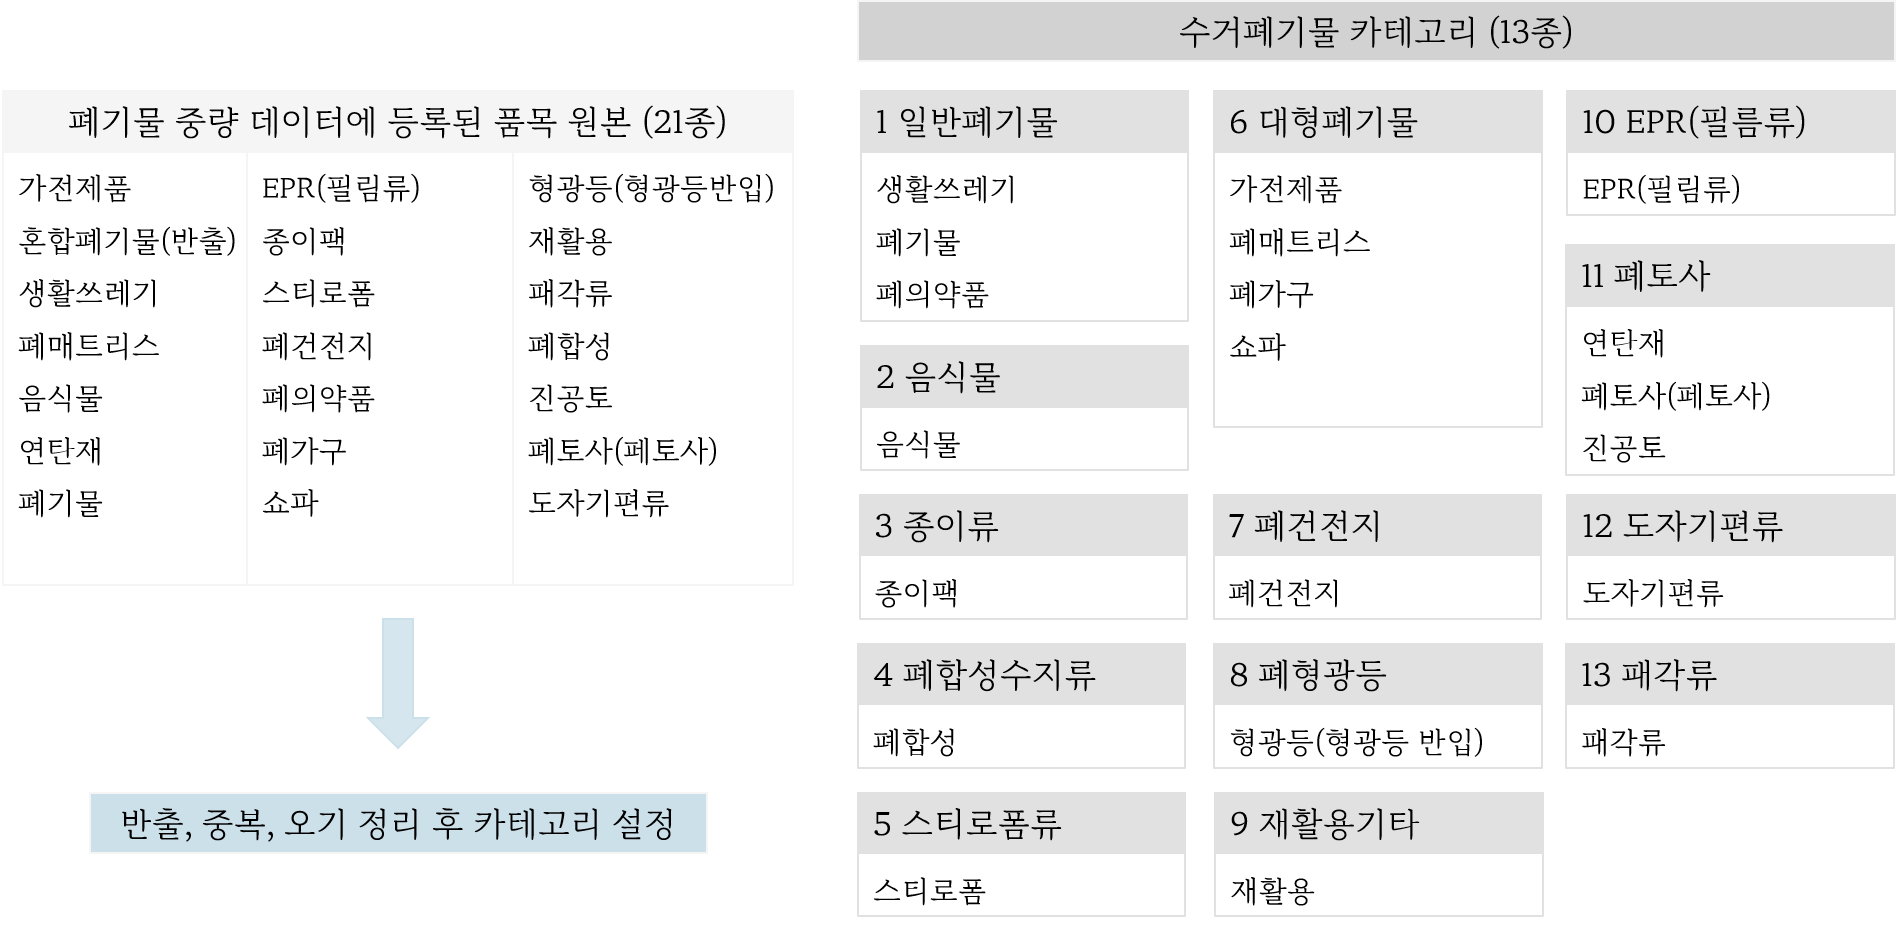

In [13]:
from IPython.display import Image
Image('C:/Users/User/Desktop/화성시(20201211~)/추가/카테고리_3.png')

In [63]:
print(set(df_19_v3['품목']))
print(set(df_20_v3['품목']))

{'진공토', '도자기편류', '재활용', '형광등반입', '폐매트리스', '연탄재', '생활쓰레기', '스티로폼', '폐합성', '형광등', '패각류', '혼합폐기물(반출)', '음식물', 'EPR(필림류)', '폐기물', '폐가구', '페토사', '종이팩', '가전제품', '쇼파', '폐건전지', '폐토사', '폐의약품'}
{'진공토', '도자기편류', '재활용', '폐매트리스', '연탄재', '혼합폐기물', '생활쓰레기', '폐의자', '스티로폼', '폐합성', '형광등', '패각류', '혼합폐기물(반출)', '음식물', '폐기물', '폐가구', '페토사', '종이팩', '가전제품', '쇼파', '폐건전지', '폐토사', '폐의약품'}


In [64]:
# Category
category = ['일반폐기물','음식물','종이류','폐합성수지류','스티로폼류','대형폐기물','폐건전지','폐형광등','재활용기타','EPR(필름류)',
           '폐토사','도자기편류','패각류']

cate_dict = {'생활쓰레기':'일반폐기물','폐기물':'일반폐기물','폐의약품':'일반폐기물','음식물':'음식물','종이팩':'종이류','폐합성':'폐합성수지류',
            '스티로폼':'스티로폼류','가전제품':'대형폐기물','폐매트리스':'대형폐기물','폐가구':'대형폐기물','쇼파':'대형폐기물','폐건전지':'폐건전지',
            '형광등':'폐형광등','형광등 반입':'폐형광등','재활용':'재활용기타','EPF(필름류)':'EPR(필름류)','연탄재':'폐토사','폐토사':'폐토사',
             '페토사':'폐토사','진공토':'폐토사','도자기편류':'도자기편류','패각류':'패각류','폐의자':'대형폐기물','형광등반입':'폐형광등',
             'EPR(필림류)':'EPR(필름류)','혼합폐기물':'일반폐기물'}

# 혼합폐기물(반출)삭제

In [65]:
# 새로운 카테고리 적용

for cate_name in list(cate_dict.keys()) :
    df_19_v3=df_19_v3.replace(cate_name,cate_dict[cate_name])
    df_20_v3=df_20_v3.replace(cate_name,cate_dict[cate_name])
df_20_v3.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0 days 00:00:00.000000000,동탄출장소,279,폐합성수지류,1590
1,2020-01-02,9:57,0 days 00:25:00.000000000,반월동,9184,폐합성수지류,300
2,2020-01-02,10:04,0 days 00:02:00.000000000,병점2동,8544,폐합성수지류,20
3,2020-01-02,10:10,0 days 00:05:00.000000000,정남면,9144,폐합성수지류,590
4,2020-01-02,10:11,0 days 00:04:00.000000000,기배동,7934,폐합성수지류,360


In [66]:
print(set(df_19_v3['품목']))
print(set(df_20_v3['품목']))

{'패각류', '혼합폐기물(반출)', '도자기편류', '폐합성수지류', '일반폐기물', '폐형광등', 'EPR(필름류)', '종이류', '폐건전지', '음식물', '폐토사', '재활용기타', '스티로폼류', '대형폐기물'}
{'패각류', '혼합폐기물(반출)', '도자기편류', '폐합성수지류', '일반폐기물', '폐형광등', '종이류', '폐건전지', '음식물', '폐토사', '재활용기타', '스티로폼류', '대형폐기물'}


---

&nbsp;  
#### 3-3 &nbsp; 품목별 집계
- 2019년

In [67]:
# 실중량 type 변경
df_19_v3.astype({'실중량':np.float})

# 품목별 count
for trash in category :
    print(trash,"의 개수는",len(df_19_v3[df_19_v3['품목']==trash]), end="\t"*3)
    print(trash,"의 총중량은", df_19_v3[df_19_v3['품목']==trash]['실중량'].sum())

일반폐기물 의 개수는 15877			일반폐기물 의 총중량은 17551700
음식물 의 개수는 5273			음식물 의 총중량은 25517840
종이류 의 개수는 270			종이류 의 총중량은 44860
폐합성수지류 의 개수는 5397			폐합성수지류 의 총중량은 2075592
스티로폼류 의 개수는 11824			스티로폼류 의 총중량은 1391060
대형폐기물 의 개수는 5349			대형폐기물 의 총중량은 5185400
폐건전지 의 개수는 506			폐건전지 의 총중량은 146030
폐형광등 의 개수는 1659			폐형광등 의 총중량은 173480
재활용기타 의 개수는 512			재활용기타 의 총중량은 504470
EPR(필름류) 의 개수는 30			EPR(필름류) 의 총중량은 56120
폐토사 의 개수는 3004			폐토사 의 총중량은 7549490
도자기편류 의 개수는 1			도자기편류 의 총중량은 9870
패각류 의 개수는 175			패각류 의 총중량은 456230


In [68]:
# datetime 출력 error 해결
df_19_v3['계량일'] = pd.to_datetime(df_19_v3['계량일'], errors='coerce')

## (sol) https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

# test
set(df_19_v3['계량일'].dt.month)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [69]:
#  Sol2 : 월별 총중량 집계

df_19_sketch01 = pd.DataFrame(columns=
                             ['Name','Count','Weight_1','Weight_2','Weight_3','Weight_4','Weight_5','Weight_6','Weight_7',
                              'Weight_8','Weight_9','Weight_10','Weight_11','Weight_12','Weight_sum'])

for trash in category :
    df_mid = {'Name':trash,'Count':len(df_19_v3[df_19_v3['품목']==trash]),
              'Weight_1':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==1)]['실중량'].sum(axis=0),
              'Weight_2':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==2)]['실중량'].sum(axis=0),
              'Weight_3':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==3)]['실중량'].sum(axis=0),
              'Weight_4':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==4)]['실중량'].sum(axis=0),
              'Weight_5':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==5)]['실중량'].sum(axis=0),
              'Weight_6':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==6)]['실중량'].sum(axis=0),
              'Weight_7':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==7)]['실중량'].sum(axis=0),
              'Weight_8':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==8)]['실중량'].sum(axis=0),
              'Weight_9':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==9)]['실중량'].sum(axis=0),
              'Weight_10':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==10)]['실중량'].sum(axis=0),
              'Weight_11':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==11)]['실중량'].sum(axis=0),
              'Weight_12':df_19_v3[(df_19_v3['품목']==trash)&(df_19_v3['계량일'].dt.month==12)]['실중량'].sum(axis=0),
              'Weight_sum':df_19_v3[df_19_v3['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df_19_sketch01 = pd.concat([df_19_sketch01, df_mid], ignore_index=True)
    df_mid = []

df_19_sketch01.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','총중량']

# # csv save
# df_19_sketch01.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_월별집계(19).csv',
#                encoding='ANSI', index=False)

df_19_sketch01.head(5)

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총중량
0,일반폐기물,15877,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,1467660,843210,1262690,2614240,17551700
1,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840
2,종이류,270,3050,2610,2650,2950,3790,1230,5250,5000,7200,3220,4010,3900,44860
3,폐합성수지류,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592
4,스티로폼류,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060


- 정렬

In [70]:
# Sort ; by='Weight_sum', descending
df_19_sketch01.sort_values(by='총중량',ascending=False)

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총중량
1,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840
0,일반폐기물,15877,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,1467660,843210,1262690,2614240,17551700
10,폐토사,3004,494370,297220,690230,763680,862670,556330,632730,660640,634130,639860,699320,618310,7549490
5,대형폐기물,5349,528440,520520,629910,524610,606760,256680,331510,682620,373010,317780,220520,193040,5185400
3,폐합성수지류,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592
4,스티로폼류,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060
8,재활용기타,512,0,0,0,0,0,245640,255720,3110,0,0,0,0,504470
12,패각류,175,35040,34120,35410,35890,46200,41850,35280,45580,40680,38970,31290,35920,456230
7,폐형광등,1659,15720,12480,14490,18710,16230,6910,5880,18430,37930,9520,8790,8390,173480
6,폐건전지,506,26810,6340,16440,15410,21490,4860,3170,10350,33610,3250,2780,1520,146030


In [95]:
# 소계 행 추가
df_19_sort_sum = df_19_sketch01.sort_values(by='총중량',ascending=False).copy()

df_19_sort_sum.loc[13] = df_19_sort_sum.sum(axis=0)
df_19_sort_sum.loc[13,'품목'] = '계'
df_19_sort_sum

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총중량
1,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840
0,일반폐기물,15877,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,1467660,843210,1262690,2614240,17551700
10,폐토사,3004,494370,297220,690230,763680,862670,556330,632730,660640,634130,639860,699320,618310,7549490
5,대형폐기물,5349,528440,520520,629910,524610,606760,256680,331510,682620,373010,317780,220520,193040,5185400
3,폐합성수지류,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592
4,스티로폼류,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060
8,재활용기타,512,0,0,0,0,0,245640,255720,3110,0,0,0,0,504470
12,패각류,175,35040,34120,35410,35890,46200,41850,35280,45580,40680,38970,31290,35920,456230
7,폐형광등,1659,15720,12480,14490,18710,16230,6910,5880,18430,37930,9520,8790,8390,173480
6,폐건전지,506,26810,6340,16440,15410,21490,4860,3170,10350,33610,3250,2780,1520,146030


In [96]:
# pie chart를 위해서 copy
df_19_sort = df_19_sketch01.sort_values(by='총중량',ascending=False).copy()
df_19_backup = df_19_sort.copy()

#### 누적차트

In [72]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 시각화를 위한 준비
%matplotlib inline 
from matplotlib import font_manager, rc                                                         ## rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="C://Windows/Fonts/MARUBuriBetaR.ttf").get_name()
rc('font', family=font_name)

In [73]:
# X축 설정
topics = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
x = range(len(topics))

- error

In [74]:
# case1
# for trash in category :
#     plt.bar(x,df_19_sketch01[df_19_sketch01['품목']==trash][topics], bottom = category[category.index(trash)-1], label =  trash)
    
# TypeError: only size-1 arrays can be converted to Python scalars --> math 함수를 numpy로 바꿔야함
##출처 http://timebird.egloos.com/v/7409152

# case2
# 자료구조를 dateframe -> numpy.array -> list로 변경함
trash01 = df_19_sketch01[df_19_sketch01['품목']=='음식물'][topics].to_numpy().tolist()[0]
trash02 = df_19_sketch01[df_19_sketch01['품목']=='일반폐기물'][topics].to_numpy().tolist()[0]
trash02

## to_numpy() / values : 같은 작용을 하나 values는 arrray를 반환하지 않을 때도 있음

[678800,
 1383960,
 1011190,
 1316750,
 2373200,
 1010480,
 1394950,
 2194570,
 1467660,
 843210,
 1262690,
 2614240]

- Sample Practice

<BarContainer object of 12 artists>

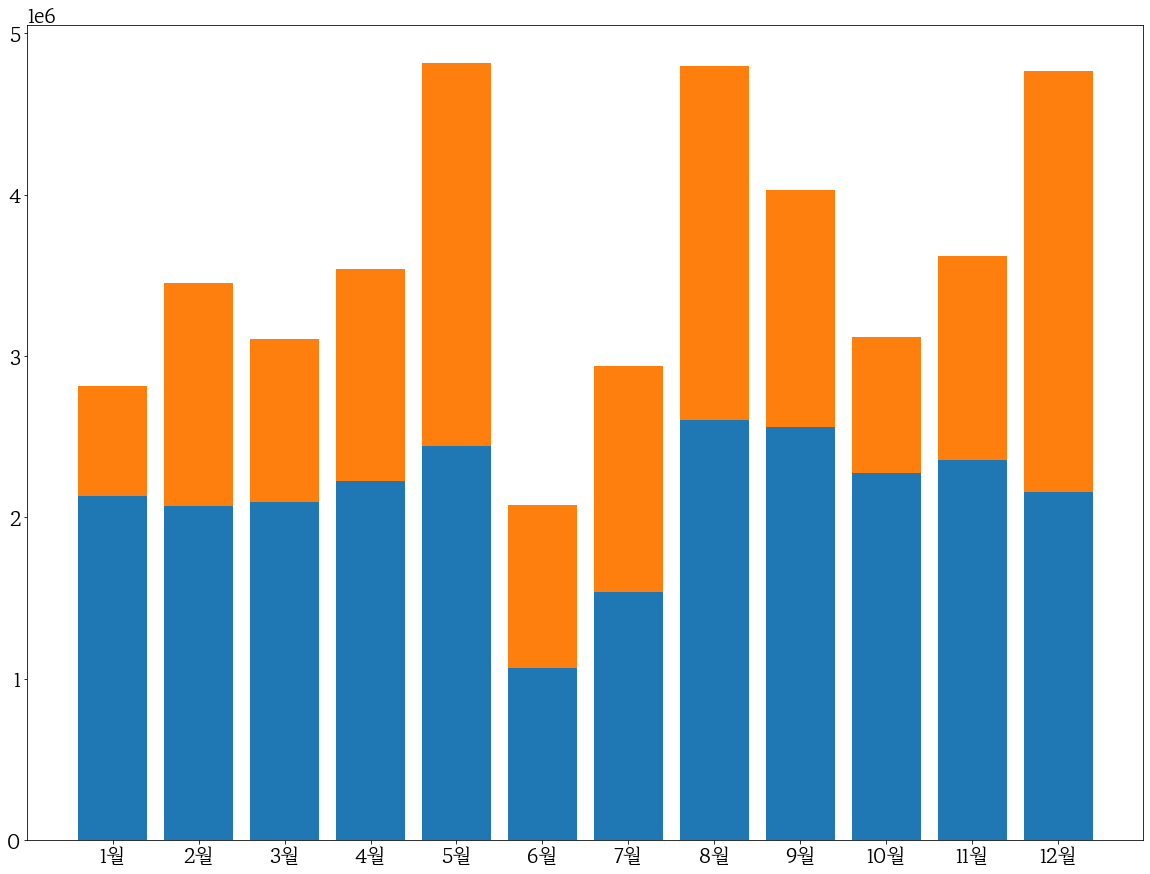

In [50]:
# size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경

# bar graph
plt.bar(topics,trash01)
plt.bar(topics,trash02, bottom = trash01, label = trash)

#### 1. &nbsp; 2019년 전체
- Bar chart

In [75]:
# 자료구조 변경
## 자료구조를 dateframe -> numpy.array -> list로 변경함 / 순서는 2019년 총중량 순서를 따름 (top8)
trash01 = df_19_sketch01[df_19_sketch01['품목']=='음식물'][topics].to_numpy().tolist()[0]
trash02 = df_19_sketch01[df_19_sketch01['품목']=='일반폐기물'][topics].to_numpy().tolist()[0]
trash03 = df_19_sketch01[df_19_sketch01['품목']=='폐토사'][topics].to_numpy().tolist()[0]
trash04 = df_19_sketch01[df_19_sketch01['품목']=='대형폐기물'][topics].to_numpy().tolist()[0]
trash05 = df_19_sketch01[df_19_sketch01['품목']=='폐합성수지류'][topics].to_numpy().tolist()[0]
trash06 = df_19_sketch01[df_19_sketch01['품목']=='스티로폼류'][topics].to_numpy().tolist()[0]
trash07 = df_19_sketch01[df_19_sketch01['품목']=='재활용기타'][topics].to_numpy().tolist()[0]
trash08 = df_19_sketch01[df_19_sketch01['품목']=='패각류'][topics].to_numpy().tolist()[0]
trash08

[35040,
 34120,
 35410,
 35890,
 46200,
 41850,
 35280,
 45580,
 40680,
 38970,
 31290,
 35920]

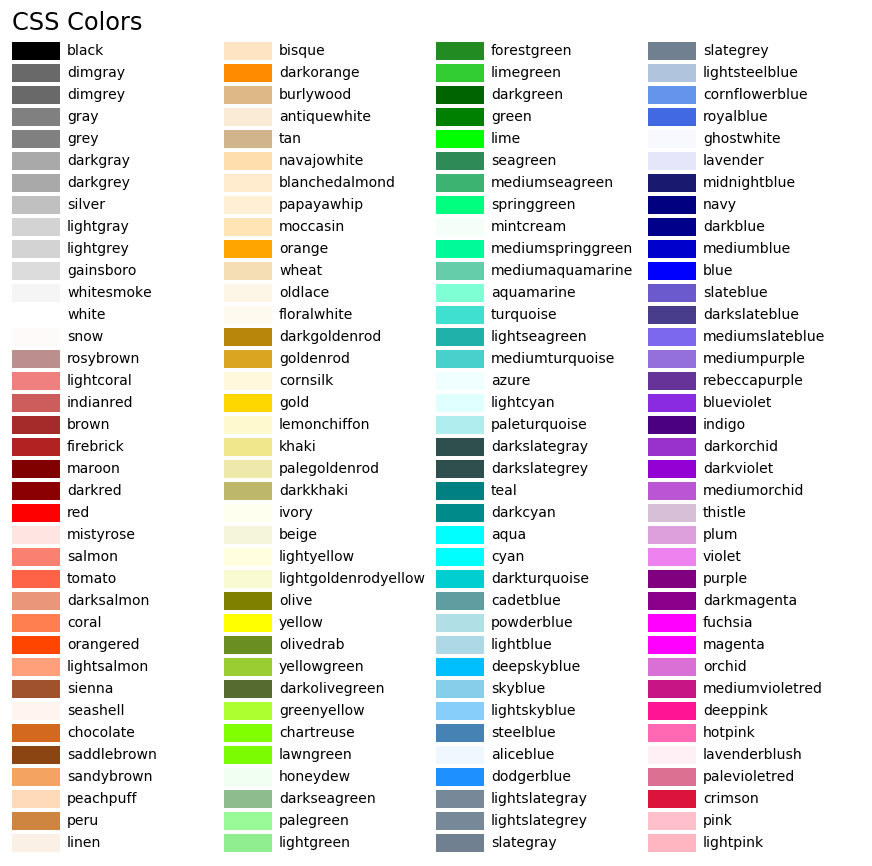

In [26]:
# matplotlig css color
Image('C:/Users/User/Desktop/color/sphx_colors_003.png')

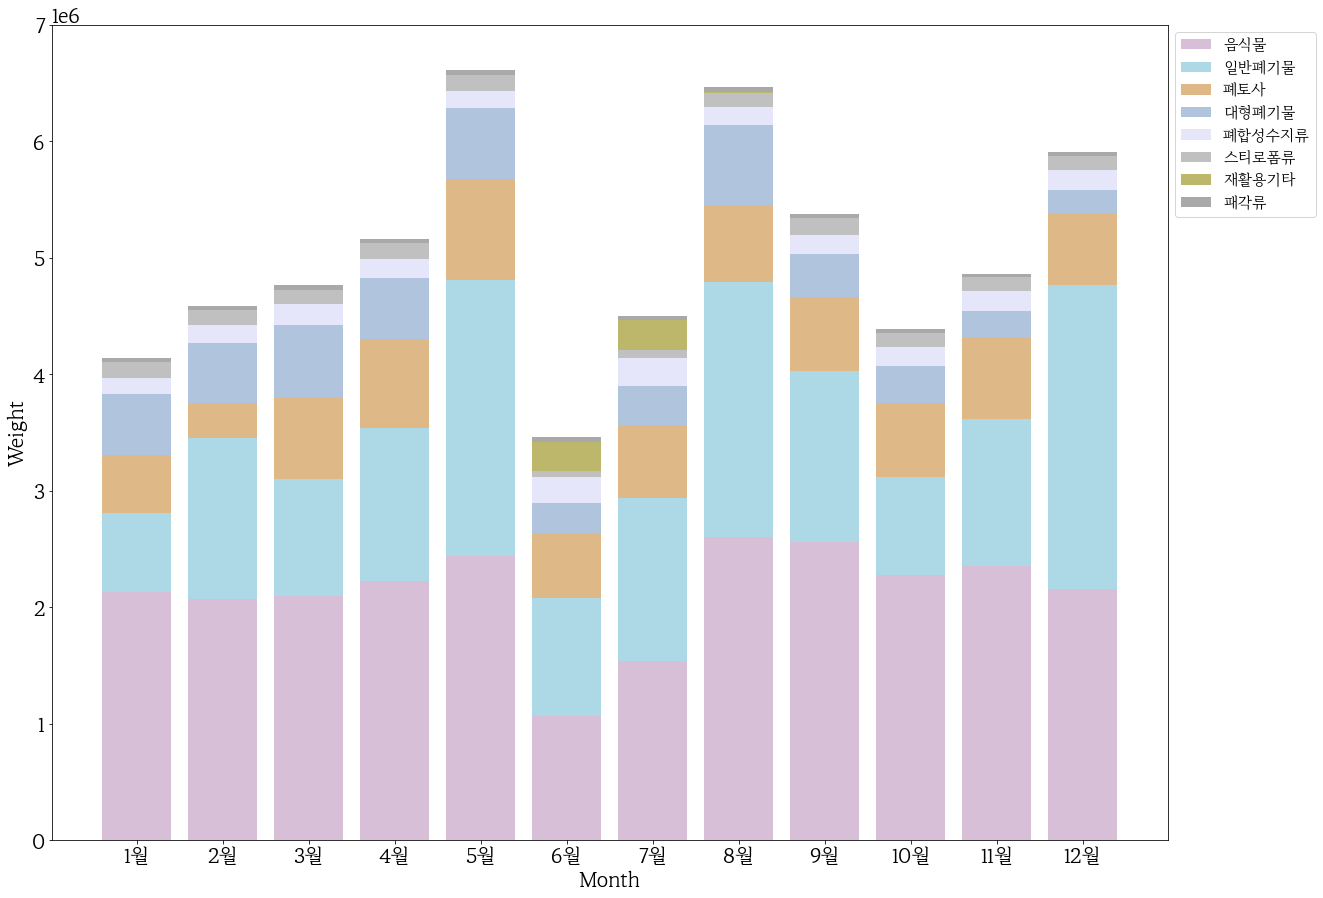

In [76]:
# size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray','plum','lightcoral','lightgreen']

# bar graph
trash = [trash01,trash02,trash03,trash04,trash05,trash06,trash07,trash08]
used_category = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','재활용기타','패각류']
bott = [0,0,0,0,0,0,0,0,0,0,0,0]

plt.xlabel('Month', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.ylim([0, 7000000])           ## 2019년과 비교를 위해서 y축 범위를 통일 (원본도 같음)

for trash_list in trash :
    trash_bar = plt.bar(topics,trash_list,bottom=bott,color=colr[trash.index(trash_list)])
    bott = np.array(bott) + np.array(trash_list)  ## list는 + 연산시 원소를 추가함. 따라서 누적을 위해서 array로 변경

plt.legend(labels=used_category,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))

- Pie chart

In [28]:
df_19_sort = df_19_backup

In [130]:
# sort 필요 -> bar chart와 통일
# Sort ; by='Weight_sum', descending
df_19_sort = df_19_sketch01.sort_values(by='총중량',ascending=False).copy()

# category 축약
used_category_v2 = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','기타']
cate_etc = ['재활용기타', '패각류','폐형광등','폐건전지','종이류','도자기편류','EPR(필름류)']

# index -> '품목'으로 설정
cate_sort = df_19_sort['품목'].tolist()
df_19_sort.reindex(cate_sort)
df_19_sort

# 부분합계
mid = df_19_sort[['수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','총중량']].iloc[6:13].sum(axis=0).tolist()

# '기타'행 추가
df_19_sort = df_19_sort.append({'품목':'기타','수거횟수':mid[0],'1월':mid[1],'2월':mid[2],'3월':mid[3],'4월':mid[4],'5월':mid[5],'6월':mid[6],
                               '7월':mid[7],'8월':mid[8],'9월':mid[9],'10월':mid[10],'11월':mid[11],'12월':mid[12],'총중량': mid[13]},ignore_index=True)
# cate_etc 삭제
for etc in cate_etc :
    df_19_sort = df_19_sort.drop(index=list(range(6,13)))
    if len(df_19_sort.index) == 7 :
        break

# 평균중량
df_19_sort['평균중량']=df_19_sort['총중량']/12
df_19_aver = df_19_sort['평균중량'].tolist()

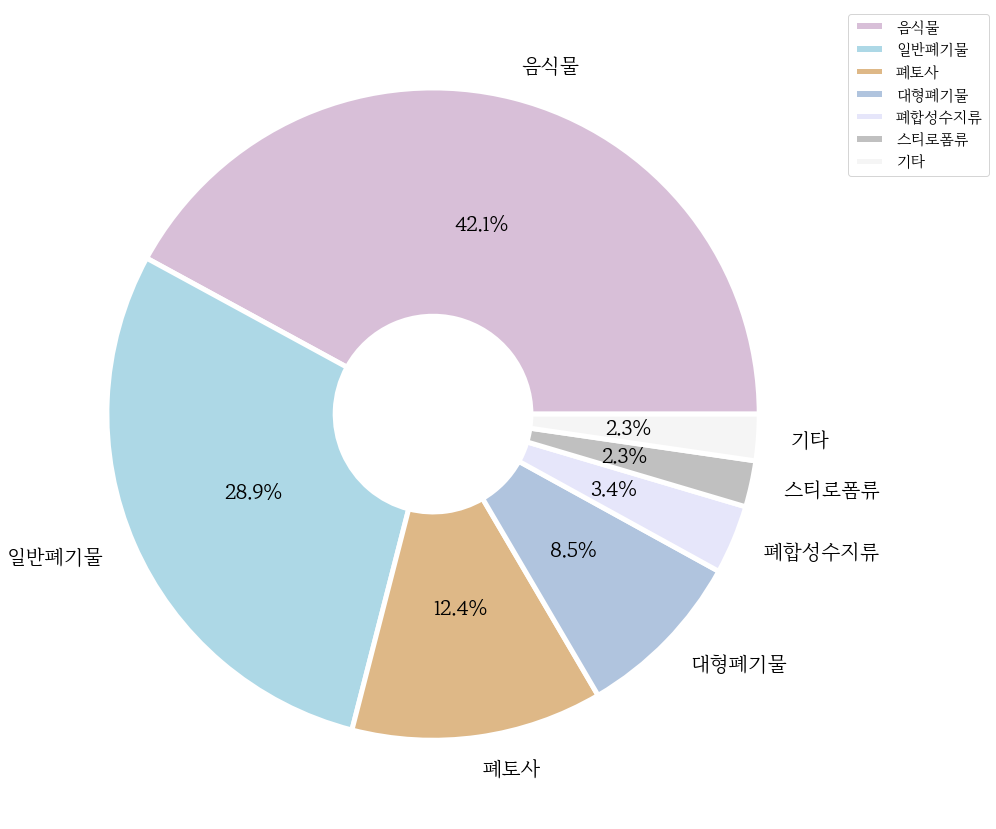

In [78]:
# Pie chart
## size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} ## 도넛모양 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','whitesmoke']

## pie
plt.pie(df_19_aver, labels=used_category_v2, autopct='%.1f%%', colors=colr, wedgeprops=wedgeprops)
plt.legend(labels=used_category_v2,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

---

#### 2. &nbsp; 2020년

In [79]:
df_20_v5 = df_20_v3.copy()
df_20_v5.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0 days 00:00:00.000000000,동탄출장소,279,폐합성수지류,1590
1,2020-01-02,9:57,0 days 00:25:00.000000000,반월동,9184,폐합성수지류,300
2,2020-01-02,10:04,0 days 00:02:00.000000000,병점2동,8544,폐합성수지류,20
3,2020-01-02,10:10,0 days 00:05:00.000000000,정남면,9144,폐합성수지류,590
4,2020-01-02,10:11,0 days 00:04:00.000000000,기배동,7934,폐합성수지류,360


In [80]:
# 빠진 품목을 발견 --> '품목' 수정하여 다시 EDA | (기존) df_20_v3 (변경후) df_20_v5
# 실중량 type 변경
df_20_v5.astype({'실중량':np.float})

# 품목별 count
for trash in category :
    print(trash,"의 개수는",len(df_20_v5[df_20_v5['품목']==trash]), end="\t"*3)
    print(trash,"의 총중량은", df_20_v5[df_20_v5['품목']==trash]['실중량'].sum())

일반폐기물 의 개수는 14254			일반폐기물 의 총중량은 20337180
음식물 의 개수는 3403			음식물 의 총중량은 17349620
종이류 의 개수는 249			종이류 의 총중량은 35250
폐합성수지류 의 개수는 4476			폐합성수지류 의 총중량은 1678910
스티로폼류 의 개수는 9332			스티로폼류 의 총중량은 1061180
대형폐기물 의 개수는 2396			대형폐기물 의 총중량은 2243730
폐건전지 의 개수는 393			폐건전지 의 총중량은 160880
폐형광등 의 개수는 975			폐형광등 의 총중량은 92050
재활용기타 의 개수는 18			재활용기타 의 총중량은 13440
EPR(필름류) 의 개수는 0			EPR(필름류) 의 총중량은 0
폐토사 의 개수는 1997			폐토사 의 총중량은 4919930
도자기편류 의 개수는 116			도자기편류 의 총중량은 27390
패각류 의 개수는 119			패각류 의 총중량은 362920


In [81]:
# datetime 출력 error 해결
df_20_v5['계량일'] = pd.to_datetime(df_20_v5['계량일'], errors='coerce')

## (sol) https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values

# test
set(df_20_v5['계량일'].dt.month)

{1, 2, 3, 4, 5, 6, 7, 8}

In [82]:
#  Sol2 : 월별 총중량 집계

df_20_sketch01 = pd.DataFrame(columns=
                             ['Name','Count','Weight_1','Weight_2','Weight_3','Weight_4','Weight_5','Weight_6','Weight_7',
                              'Weight_8','Weight_sum'])

for trash in category :
    df_mid = {'Name':trash,'Count':len(df_20_v5[df_20_v5['품목']==trash]),
              'Weight_1':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==1)]['실중량'].sum(),
              'Weight_2':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==2)]['실중량'].sum(),
              'Weight_3':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==3)]['실중량'].sum(),
              'Weight_4':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==4)]['실중량'].sum(),
              'Weight_5':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==5)]['실중량'].sum(),
              'Weight_6':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==6)]['실중량'].sum(),
              'Weight_7':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==7)]['실중량'].sum(),
              'Weight_8':df_20_v5[(df_20_v5['품목']==trash)&(df_20_v5['계량일'].dt.month==8)]['실중량'].sum(),
              'Weight_sum':df_20_v5[df_20_v5['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df_20_sketch01 = pd.concat([df_20_sketch01, df_mid], ignore_index=True)
    df_mid = []

df_20_sketch01.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','총중량']

# csv save
# df_20_sketch01.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_월별집계(20)_v5.csv',
#                encoding='ANSI', index=False)

df_20_sketch01

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
0,일반폐기물,14254,2081740,2083210,2472810,2500920,2948630,2758080,2850070,2641720,20337180
1,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620
2,종이류,249,4180,2690,4920,4210,5410,4470,5200,4170,35250
3,폐합성수지류,4476,170050,174810,238290,215630,222800,238220,202190,216920,1678910
4,스티로폼류,9332,138430,123770,154660,127500,124850,131410,136680,123880,1061180
5,대형폐기물,2396,238530,276470,301720,316060,340080,269990,313100,187780,2243730
6,폐건전지,393,3970,28550,23850,24020,13940,37580,17850,11120,160880
7,폐형광등,975,20900,10270,15640,12530,10370,8440,8520,5380,92050
8,재활용기타,18,0,0,0,0,0,0,0,13440,13440
9,EPR(필름류),0,0,0,0,0,0,0,0,0,0


- 정렬

In [83]:
# Sort ; by='Weight_sum', descending
df_20_sort = df_20_sketch01.sort_values(by='총중량',ascending=False).copy()
df_20_sort

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
0,일반폐기물,14254,2081740,2083210,2472810,2500920,2948630,2758080,2850070,2641720,20337180
1,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620
10,폐토사,1997,672310,557800,876720,656860,512420,564700,571400,507720,4919930
5,대형폐기물,2396,238530,276470,301720,316060,340080,269990,313100,187780,2243730
3,폐합성수지류,4476,170050,174810,238290,215630,222800,238220,202190,216920,1678910
4,스티로폼류,9332,138430,123770,154660,127500,124850,131410,136680,123880,1061180
12,패각류,119,35920,29700,38650,42400,68800,48830,50290,48330,362920
6,폐건전지,393,3970,28550,23850,24020,13940,37580,17850,11120,160880
7,폐형광등,975,20900,10270,15640,12530,10370,8440,8520,5380,92050
2,종이류,249,4180,2690,4920,4210,5410,4470,5200,4170,35250


In [97]:
# 소계 행 추가
df_20_backup = df_20_sort.copy()

df_20_sort_sum = df_20_sort.copy()
df_20_sort_sum.loc[13] = df_20_sort_sum.sum(axis=0)
df_20_sort_sum.loc[13,'품목'] = '계'
df_20_sort_sum

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
0,일반폐기물,14254,2081740,2083210,2472810,2500920,2948630,2758080,2850070,2641720,20337180
1,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620
10,폐토사,1997,672310,557800,876720,656860,512420,564700,571400,507720,4919930
5,대형폐기물,2396,238530,276470,301720,316060,340080,269990,313100,187780,2243730
3,폐합성수지류,4476,170050,174810,238290,215630,222800,238220,202190,216920,1678910
4,스티로폼류,9332,138430,123770,154660,127500,124850,131410,136680,123880,1061180
12,패각류,119,35920,29700,38650,42400,68800,48830,50290,48330,362920
6,폐건전지,393,3970,28550,23850,24020,13940,37580,17850,11120,160880
7,폐형광등,975,20900,10270,15640,12530,10370,8440,8520,5380,92050
2,종이류,249,4180,2690,4920,4210,5410,4470,5200,4170,35250


&nbsp;  
#### 2019년 8월 재추출

In [115]:
# 2019년 8월까지 추출

df_19_v4 = df_19_v3.loc[:32929].copy()
df_19_v4.tail(5)

,계량일,계량시간,수거시간,거래처,차량번호,품목,실중량
32925,2019-08-31,9:32:12,0 days 00:06:55.000000000,(주)평촌,6401,스티로폼류,10
32926,2019-08-31,9:39:15,0 days 00:01:39.000000000,(주)평촌,6401,일반폐기물,40
32927,2019-08-31,9:37:07,0 days 00:16:18.000000000,(주)나눔환경,1800,스티로폼류,200
32928,2019-08-31,9:56:08,0 days 00:11:20.000000000,(주)은호ENT,3418,스티로폼류,110
32929,2019-08-31,8:52:10,NaN,영진자원재생,4874,일반폐기물,0


In [116]:
# 2019년 8월까지 비교
##  Sol2 : 월별 총중량 집계

df_19_sketch02 = pd.DataFrame(columns=
                             ['Name','Count','Weight_1','Weight_2','Weight_3','Weight_4','Weight_5','Weight_6','Weight_7',
                              'Weight_8','Weight_sum'])

for trash in category :
    df_mid = {'Name':trash,'Count':len(df_19_v4[df_19_v4['품목']==trash]),
              'Weight_1':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==1)]['실중량'].sum(),
              'Weight_2':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==2)]['실중량'].sum(),
              'Weight_3':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==3)]['실중량'].sum(),
              'Weight_4':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==4)]['실중량'].sum(),
              'Weight_5':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==5)]['실중량'].sum(),
              'Weight_6':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==6)]['실중량'].sum(),
              'Weight_7':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==7)]['실중량'].sum(),
              'Weight_8':df_19_v4[(df_19_v4['품목']==trash)&(df_19_v4['계량일'].dt.month==8)]['실중량'].sum(),
              'Weight_sum':df_19_v4[df_19_v4['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df_19_sketch02 = pd.concat([df_19_sketch02, df_mid], ignore_index=True)
    df_mid = []

df_19_sketch02.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','총중량']

# csv save
# df_20_sketch01.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_월별집계(20)_v5.csv',
#                encoding='ANSI', index=False)

df_19_sketch02

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
0,일반폐기물,10158,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,11363900
1,음식물,3413,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,16171450
2,종이류,154,3050,2610,2650,2950,3790,1230,5250,5000,26530
3,폐합성수지류,3576,138200,149530,180210,165230,147140,226472,238500,152190,1397472
4,스티로폼류,7581,131310,129110,122340,130580,136910,55100,71110,127750,904210
5,대형폐기물,4043,528440,520520,629910,524610,606760,256680,331510,682620,4081050
6,폐건전지,330,26810,6340,16440,15410,21490,4860,3170,10350,104870
7,폐형광등,1080,15720,12480,14490,18710,16230,6910,5880,18430,108850
8,재활용기타,512,0,0,0,0,0,245640,255720,3110,504470
9,EPR(필름류),29,22580,13760,8370,9370,0,0,0,0,54080


In [117]:
# Sort ; by='Weight_sum', descending
df_19_sort_2 = df_19_sketch02.sort_values(by='총중량',ascending=False).copy()

# 소계 행 추가
df_19_backup_2 = df_19_sort_2.copy()

df_19_sort_sum2 = df_19_sort_2.copy()
df_19_sort_sum2.loc[13] = df_19_sort_sum2.sum(axis=0)
df_19_sort_sum2.loc[13,'품목'] = '계'
df_19_sort_sum2

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량
1,음식물,3413,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,16171450
0,일반폐기물,10158,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,11363900
10,폐토사,1921,494370,297220,690230,763680,862670,556330,632730,660640,4957870
5,대형폐기물,4043,528440,520520,629910,524610,606760,256680,331510,682620,4081050
3,폐합성수지류,3576,138200,149530,180210,165230,147140,226472,238500,152190,1397472
4,스티로폼류,7581,131310,129110,122340,130580,136910,55100,71110,127750,904210
8,재활용기타,512,0,0,0,0,0,245640,255720,3110,504470
12,패각류,118,35040,34120,35410,35890,46200,41850,35280,45580,309370
7,폐형광등,1080,15720,12480,14490,18710,16230,6910,5880,18430,108850
6,폐건전지,330,26810,6340,16440,15410,21490,4860,3170,10350,104870


- Bar chart

In [84]:
# X축 설정
topics_v2 = ['1월','2월','3월','4월','5월','6월','7월','8월']
x_2 = range(len(topics))

In [85]:
# 자료구조 변경 (trash01 - trash08)  -> 순서는 2019년 총중량 순서를 따름 (top8) -> 2019년과 비교
## 자료구조를 dateframe -> numpy.array -> list로 변경함

trash01_v2 = df_20_sketch01[df_20_sketch01['품목']=='음식물'][topics_v2].to_numpy().tolist()[0]
trash02_v2 = df_20_sketch01[df_20_sketch01['품목']=='일반폐기물'][topics_v2].to_numpy().tolist()[0]
trash03_v2 = df_20_sketch01[df_20_sketch01['품목']=='폐토사'][topics_v2].to_numpy().tolist()[0]
trash04_v2 = df_20_sketch01[df_20_sketch01['품목']=='대형폐기물'][topics_v2].to_numpy().tolist()[0]
trash05_v2 = df_20_sketch01[df_20_sketch01['품목']=='폐합성수지류'][topics_v2].to_numpy().tolist()[0]
trash06_v2 = df_20_sketch01[df_20_sketch01['품목']=='스티로폼류'][topics_v2].to_numpy().tolist()[0]
trash07_v2 = df_20_sketch01[df_20_sketch01['품목']=='재활용기타'][topics_v2].to_numpy().tolist()[0]
trash08_v2 = df_20_sketch01[df_20_sketch01['품목']=='패각류'][topics_v2].to_numpy().tolist()[0]
trash08_v2

[35920, 29700, 38650, 42400, 68800, 48830, 50290, 48330]

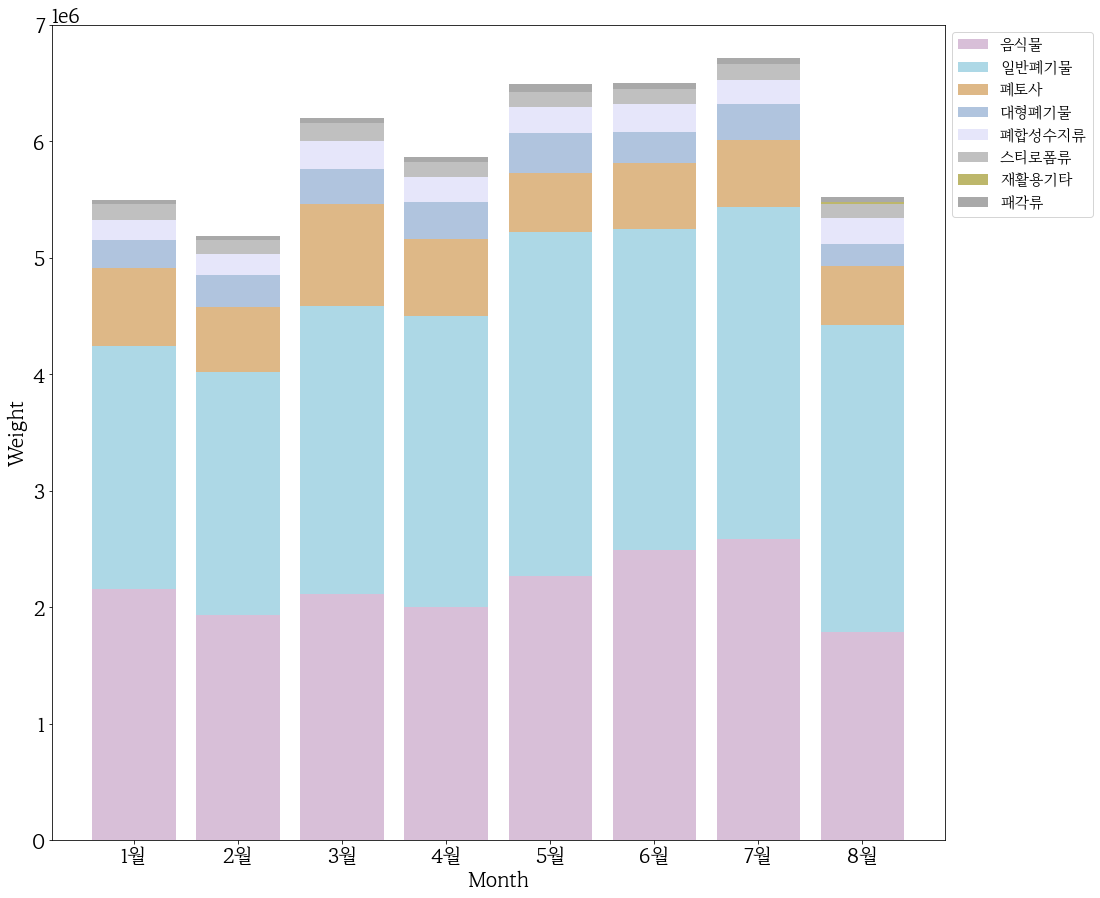

In [92]:
# size
plt.figure(figsize=(16, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성 (2019년과 동일하게 설정)
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray','plum','lightcoral','lightgreen']

# bar graph
trash_v2 = [trash01_v2,trash02_v2,trash03_v2,trash04_v2,trash05_v2,trash06_v2,trash07_v2,trash08_v2]
used_category = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','재활용기타','패각류']
bott = [0,0,0,0,0,0,0,0]

plt.xlabel('Month', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.ylim([0, 7000000])           ## 2019년과 비교를 위해서 y축 범위를 통일 (원본 : 2019년-6*le6, 2020년-7*le7)

for trash_list in trash_v2 :
    plt.bar(topics_v2,trash_list,bottom=bott,color=colr[trash_v2.index(trash_list)])
    bott = np.array(bott) + np.array(trash_list)  ## list는 + 연산시 원소를 추가함. 따라서 누적을 위해서 array로 변경

plt.legend(labels=used_category,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0)) ## category 표기

- Pie chart

In [119]:
df_20_sort = df_20_sketch01.sort_values(by='총중량',ascending=False).copy()
df_20_backup = df_20_sort.copy()

In [121]:
# category 축약
used_category_v2 = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','기타']
cate_etc = ['재활용기타', '패각류','폐형광등','폐건전지','종이류','도자기편류','EPR(필름류)']

# index -> '품목'으로 설정
cate_sort = df_20_sort['품목'].tolist()
df_20_sort.reindex(cate_sort)
df_20_sort

# 부분합계
mid = df_20_sort[['수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','총중량']].iloc[6:13].sum(axis=0).tolist()

# '기타'행 추가
df_20_sort = df_20_sort.append({'품목':'기타','수거횟수':mid[0],'1월':mid[1],'2월':mid[2],'3월':mid[3],'4월':mid[4],'5월':mid[5],'6월':mid[6],
                               '7월':mid[7],'8월':mid[8],'총중량': mid[9]},ignore_index=True)
# cate_etc 삭제
for etc in cate_etc :
    df_20_sort = df_20_sort.drop(index=list(range(6,13)))
    if len(df_20_sort.index) == 7 :
        break

# 평균중량
df_20_sort['평균중량']=df_20_sort['총중량']/8
df_20_aver = df_20_sort['평균중량'].tolist()

df_20_sort

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,총중량,평균중량
0,일반폐기물,14254,2081740,2083210,2472810,2500920,2948630,2758080,2850070,2641720,20337180,2.54215e+06
1,음식물,3403,2159890,1938070,2113690,2003340,2271230,2489620,2589220,1784560,17349620,2.1687e+06
2,폐토사,1997,672310,557800,876720,656860,512420,564700,571400,507720,4919930,614991
3,대형폐기물,2396,238530,276470,301720,316060,340080,269990,313100,187780,2243730,280466
4,폐합성수지류,4476,170050,174810,238290,215630,222800,238220,202190,216920,1678910,209864
5,스티로폼류,9332,138430,123770,154660,127500,124850,131410,136680,123880,1061180,132648
13,기타,1870,64970,71210,83060,83160,98520,99320,81860,109830,691930,86491.2


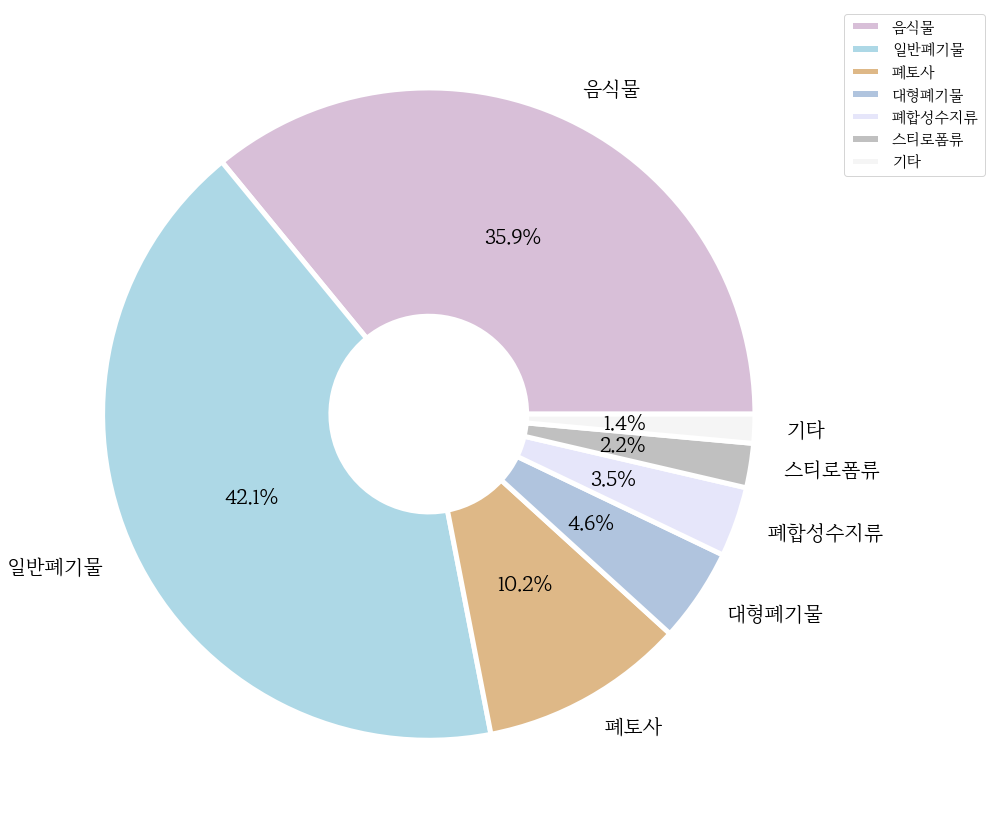

In [126]:
# New Pie Chart
used_category_v3 = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','기타']
# df_20_aver[0], df_20_aver[1] = df_20_aver[1], df_20_aver[0]  ## category 순서대로 값 정렬

## size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} ## 도넛모양 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','whitesmoke']

## pie
plt.pie(df_20_aver, labels=used_category_v3, autopct='%.1f%%', colors=colr, wedgeprops=wedgeprops)
plt.legend(labels=used_category_v2,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

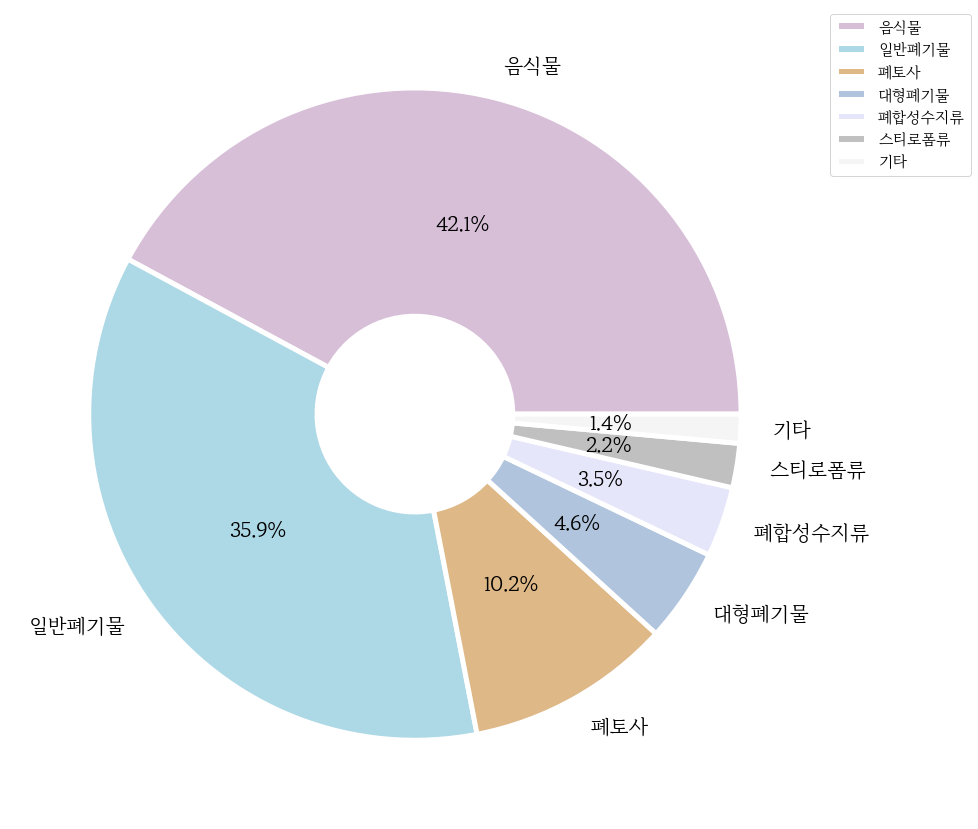

In [760]:
# Pie chart
## size
plt.figure(figsize=(20, 15))           ## figure size 변경
plt.rc('font',size=20)                 ## font size 변경
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5} ## 도넛모양 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','whitesmoke']

## pie
plt.pie(df_20_aver, labels=used_category_v2, autopct='%.1f%%', colors=colr, wedgeprops=wedgeprops)
plt.legend(labels=used_category_v2,fontsize=15,loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

---

&nbsp;  
## 4 &nbsp; 품목별 평균 수거중량/수거시간
- 전체 데이터에서 outlier 조회 및 처리

&nbsp;  
#### 4-1 &nbsp; Data Read

In [680]:
df_19_v4 = df_19_v3.copy()
df_20_v4 = df_20_v3.copy()

df_20_v4.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0 days 00:00:00.000000000,동탄출장소,279,폐합성수지류,1590
1,2020-01-02,9:57,0 days 00:25:00.000000000,반월동,9184,폐합성수지류,300
2,2020-01-02,10:04,0 days 00:02:00.000000000,병점2동,8544,폐합성수지류,20
3,2020-01-02,10:10,0 days 00:05:00.000000000,정남면,9144,폐합성수지류,590
4,2020-01-02,10:11,0 days 00:04:00.000000000,기배동,7934,폐합성수지류,360


&nbsp;  
### 4-2 &nbsp; 수거시간 outlier 처리 
#### 2019년
- 수거시간 outlier 1차 정제 (상차시각, 공차시각이 바뀜 : '-n days' 로 출력 -> '+ 시간'으로 바꿈)

In [671]:
from datetime import timedelta

In [474]:
# 수거시간을 초단위로 환산

def data_min(time_value) :
    return int(time_value[0])*24*60*60 + int(time_value[7:9])*60*60 + int(time_value[10:12])*60 + int(time_value[13:15])

In [ ]:
## backup
df_19_bkv4 = df_19_v4.copy()

- case1 : &nbsp; -1 &nbsp; days

In [696]:
## backup
df_19_v4 = df_19_bkv4

In [697]:
# Case1 : -1 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case01 = list(df_19_v4[df_19_v4['수거시간'].str.contains('-1', na=False)].index)

for num in case01 :
    try :
        date_value = str(df_19_v4.loc[num,'수거시간'])

        old_date01 = datetime.datetime.strptime(date_value[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date01 = (std - old_date01) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date01 = new_date01.time()                  ## type : 'HH:MM:SS'

        ch_date =  '0 days ' + str(new_date01)

        df_19_v4.loc[num, '수거시간'] = ch_date
        
    except :
        print(num)  ## 바뀌었는데 error가 나옴

29411


In [698]:
# case1 검증
# error 내용 확인 --> data 조회
print(df_19_v4.loc[29411,'수거시간'])    ## -13days --> 바로 결측치처리
print(df_19_v3.loc[29411,'수거시간'])

# replace
df_19_v4.loc[29411,'수거시간'] = '0 days 00:00:00'

# 변경확인
list(df_19_v4[df_19_v4['수거시간'].str.contains('-1', na=False)].index)

-13 days +00:00:00.000000000
-13 days +00:00:00.000000000


[]

- case2 : &nbsp; -2 &nbsp; days

In [699]:
# Case2 : -2 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case02 = list(df_19_v4[df_19_v4['수거시간'].str.contains('-2', na=False)].index)

for num02 in case02 :
    try :
        date_value02 = str(df_19_v4.loc[num02,'수거시간'])

        old_date02 = datetime.datetime.strptime(date_value02[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date02 = (std - old_date02) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date02 = new_date02.time()                  ## type : 'HH:MM:SS'

        ch_date02 =  '1 days ' + str(new_date02)

        df_19_v4.loc[num02, '수거시간'] = ch_date02
        
    except :
        print(num02)
        
## len(list(df_19_v4[df_19_v4['수거시간'].str.contains('-2', na=False)].index)) 처음 개수 == 9

In [700]:
# case2 검증
list(df_19_v4[df_19_v4['수거시간'].str.contains('-2', na=False)].index)   ## 0

[]

- Case3: &nbsp; -3 &nbsp; days

In [701]:
# Case3 : -3 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case03 = list(df_19_v4[df_19_v4['수거시간'].str.contains('-3', na=False)].index)

for num03 in case03 :
    try :
        date_value03 = str(df_19_v4.loc[num03,'수거시간'])

        old_date03 = datetime.datetime.strptime(date_value03[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date03 = (std - old_date03) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date03 = new_date03.time()                  ## type : 'HH:MM:SS'

        ch_date03 =  '2 days ' + str(new_date03)

        df_19_v4.loc[num03, '수거시간'] = ch_date03
        
    except :
        print(num03)

In [702]:
# case3 검증
list(df_19_v4[df_19_v4['수거시간'].str.contains('-3', na=False)].index)   ## 0

[]

- Case4 : &nbsp; 결측치 채우기

In [703]:
# 결측치 -> '0 days 00:00:00' (수거시간 집계를 위해서 형식 통일)

df_19_v4.fillna({'수거시간':'0 days 00:00:00'},inplace=True)
df_19_v4['수거시간'].isnull().sum()

0

- 2019년 수거시간 오차수정 확인

In [704]:
# '3 days'가 있는 것을 확인함
print(len(df_19_v4[df_19_v4['수거시간'].str.contains('0 days', na=False)]))  ## 49901
print(len(df_19_v4[df_19_v4['수거시간'].str.contains('1 days', na=False)]))  ## 14
print(len(df_19_v4[df_19_v4['수거시간'].str.contains('2 days', na=False)]))  ## 4
print(len(df_19_v4)) ## 49919

49901
14
4
49919


In [705]:
# csv save
df_19_v4.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_계근량(19)_v5.csv',
               encoding='ANSI', index=False)
df_19_bkv5 = df_19_v4.copy()
df_19_v5 = df_19_bkv5

&nbsp;  
#### Data Total-seconds

In [707]:
# data_min 활용 <-- 위에서 정의함
## test
print(df_19_v5['수거시간'][5])      ## 0 days 00:08:22.000000000
data_min(df_19_v5['수거시간'][5])   ## 502

# 2019년 적용    ## backup : df_19_bk5
err_count = []

for i in range(0,len(df_19_v5)) :
    try :
        basic_time = df_19_v5.loc[i,'수거시간']
        df_19_v5.loc[i, '수거시간'] = data_min(basic_time)
        
    except :
        err_count.append('1')

print('error 는 ', len(err_count))
df_19_v5.head(5)

0 days 00:08:22.000000000
0


,계량일,계량시간,수거시간,거래처,차량번호,품목,실중량
0,2019-01-01,7:24:36,0,(주)크린시티화성,3228,음식물,1480
1,2019-01-01,7:28:25,830,에코한마음협동조합,416,스티로폼류,180
2,2019-01-01,7:30:38,1164,(주)향원실업,2460,스티로폼류,170
3,2019-01-01,7:38:17,881,(주)부경크린,6371,스티로폼류,220
4,2019-01-01,7:55:46,410,(주)화성,9011,폐토사,1190


---

&nbsp;  
#### Seaborn boxplot

In [360]:
import seaborn as sns

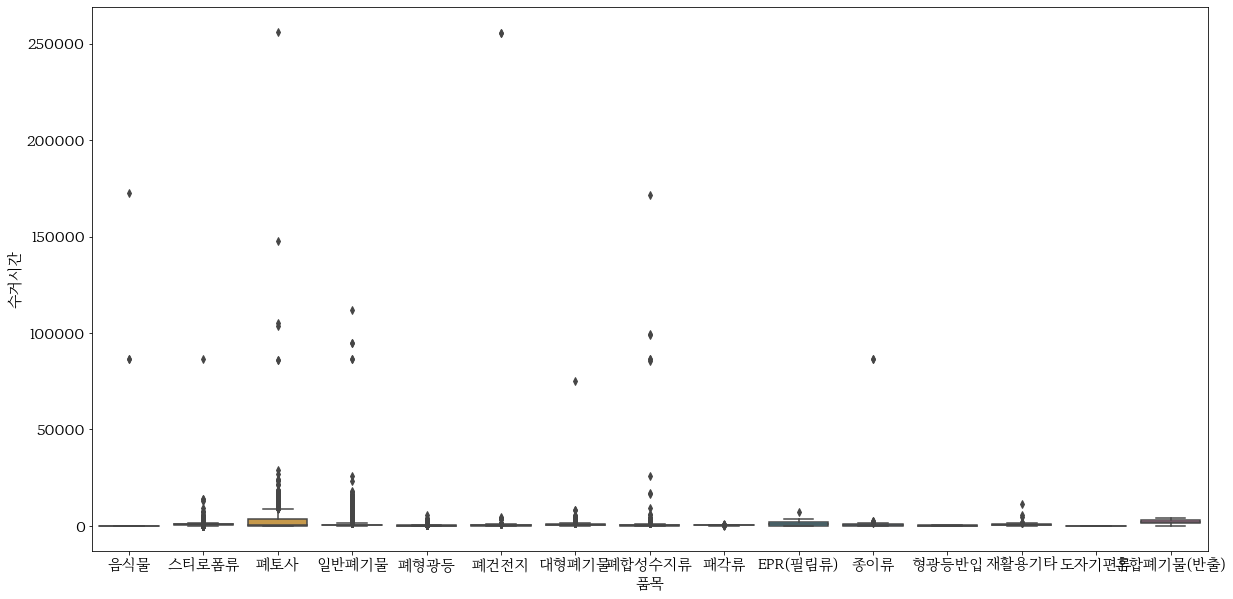

In [708]:
# Boxplot
## size
plt.figure(figsize=(20, 10))           ## figure size 변경
plt.rc('font',size=15)                 ## font size 변경

# box plot
sns.boxplot(x='품목',y='수거시간',data=df_19_v5)
plt.show()

#### STEP 1 &nbsp; : &nbsp; 혼합폐기물(반출) 삭제

In [709]:
df_19_v5 = df_19_v5[df_19_v5['품목'] != '혼합폐기물(반출)']

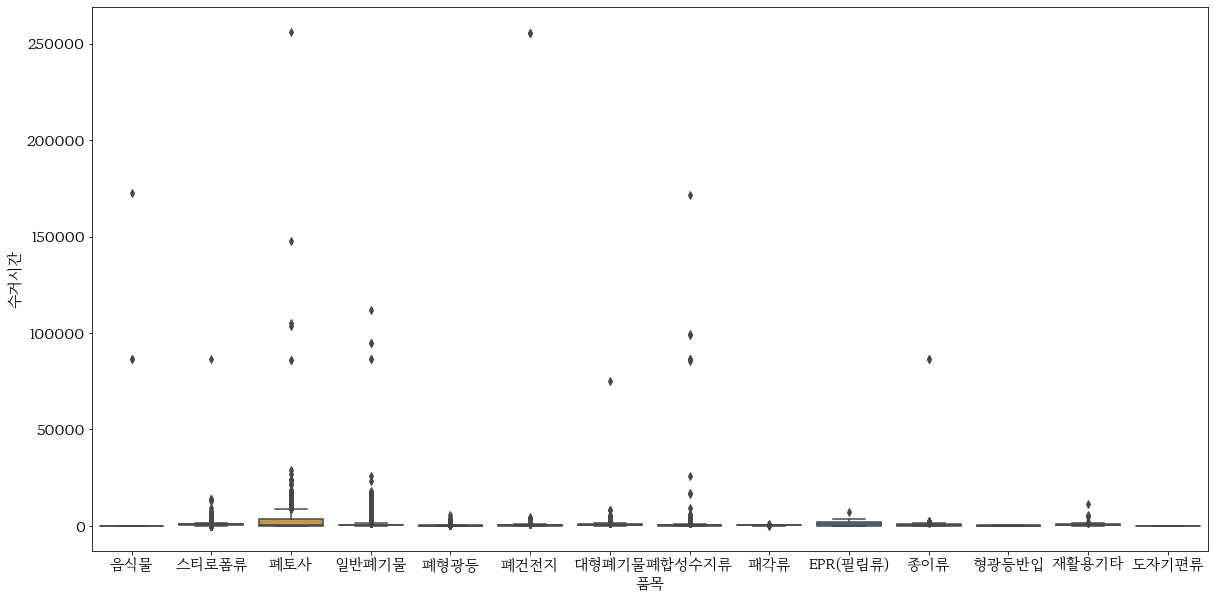

In [710]:
# Boxplot
## size
plt.figure(figsize=(20, 10))           ## figure size 변경
plt.rc('font',size=15)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','whitesmoke']

sns.boxplot(x='품목',y='수거시간',data=df_19_v5)
plt.show()

&nbsp;  
#### STEP 2 &nbsp; : &nbsp; Outlier 제거 함수 설정 및 적용

In [711]:
def del_outlier(data, case, column) :
    mid = data[data['품목'] == case]
    
    q1 = mid[column].quantile(0.25)   ## quantile : 백분위수를 의미하는 pandas 함수. 같은 기능으로 numpy.percentile이 있음
    q3 = mid[column].quantile(0.75)
    
    iqr = 1.5*(q3 - q1)   ## IQR(사분위)를 벗어난 값
    
    outlier_index = mid[(mid[column] < q1 - 1.5 * iqr) | (mid[column] > q3 + 1.5 * iqr)].index
    print(case,'의 이상치 개수는 ', len(outlier_index))
    
    data.loc[outlier_index, column] = 0
    return data

In [712]:
# outlier delete
# del_outlier(data, case, column)
## category == 전체 품목 list

for ct_name in category :
    try :
        del_outlier(df_19_v5, ct_name, '수거시간')
        
    except :
        print(ct_name)
        continue

일반폐기물 의 이상치 개수는  1252
음식물 의 이상치 개수는  3
종이류 의 이상치 개수는  5
폐합성수지류 의 이상치 개수는  221
스티로폼류 의 이상치 개수는  349
대형폐기물 의 이상치 개수는  85
폐건전지 의 이상치 개수는  18
폐형광등 의 이상치 개수는  84
재활용기타 의 이상치 개수는  4
EPR(필름류) 의 이상치 개수는  0
폐토사 의 이상치 개수는  76
도자기편류 의 이상치 개수는  0
패각류 의 이상치 개수는  7


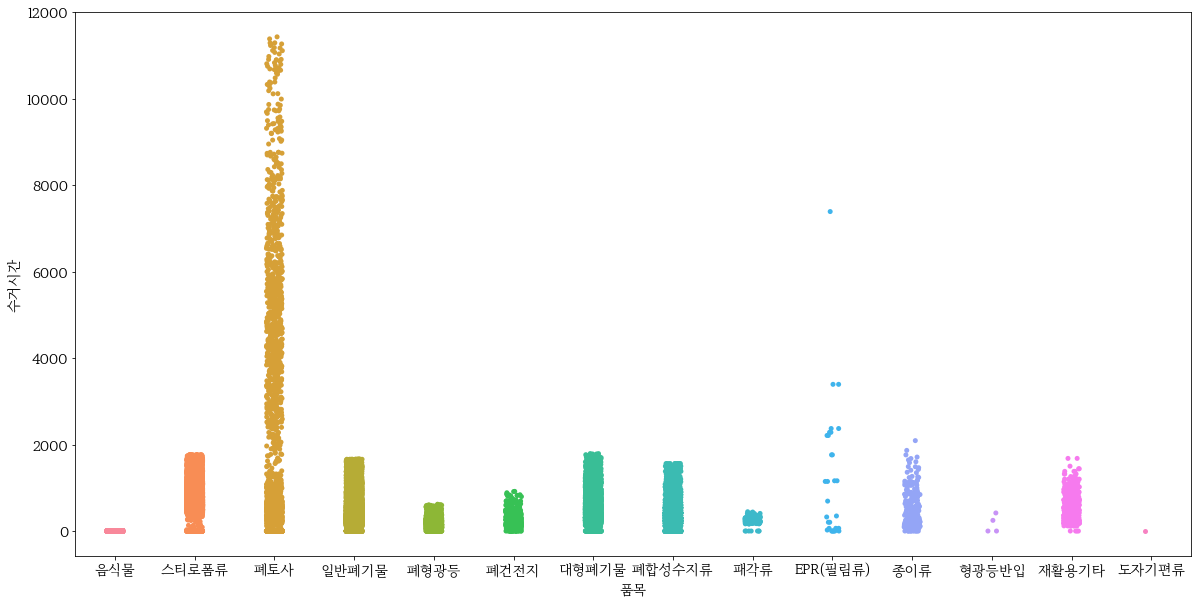

In [713]:
# Stripplot
## size
plt.figure(figsize=(20, 10))           ## figure size 변경
plt.rc('font',size=14)                 ## font size 변경

# seaborn color set
colr = sns.set_palette("GnBu_d")

# boxplot
sns.stripplot(x='품목',y='수거시간',data=df_19_v5 )
plt.show()

In [ ]:
# matplotlib boxplot

plt.boxplot()

In [791]:
np.array(df_19[df_19['품목']=='음식물']['수거시간'])

array([0, 0, 0, ..., 0, 0, 0], dtype='timedelta64[ns]')

In [787]:
set(df_19_v5[df_19_v5['품목']=='음식물']['수거시간'])

{0}

---

&nbsp;  
#### 2020년
- 수거시간 outlier 1차 정제 (상차시각, 공차시각이 바뀜 : '-n days' 로 출력 -> '+ 시간'으로 바꿈)

In [714]:
df_20_bkv4 = df_20_v4.copy()

In [675]:
# 수거시간을 초단위로 환산

def data_min(time_value) :
    return int(time_value[0])*24*60*60 + int(time_value[7:9])*60*60 + int(time_value[10:12])*60 + int(time_value[13:15])

- case1 &nbsp; &nbsp;  -1 days

In [715]:
df_20_v4 = df_20_bkv4

In [716]:
# Case1 : -1 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case01 = list(df_20_v4[df_20_v4['수거시간'].str.contains('-1', na=False)].index)

for num in case01 :
    try :
        date_value = str(df_20_v4.loc[num,'수거시간'])

        old_date01 = datetime.datetime.strptime(date_value[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date01 = (std - old_date01) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date01 = new_date01.time()                  ## type : 'HH:MM:SS'

        ch_date =  '0 days ' + str(new_date01)

        df_20_v4.loc[num, '수거시간'] = ch_date
        
    except :
        print(num)

In [717]:
# case1 검증
# 변경확인
list(df_20_v4[df_20_v4['수거시간'].str.contains('-1', na=False)].index)

[]

- case2 &nbsp; : &nbsp; -2days

In [719]:
# Case2 : -2 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case02 = list(df_20_v4[df_20_v4['수거시간'].str.contains('-2', na=False)].index)

for num02 in case02 :
    try :
        date_value02 = str(df_20_v4.loc[num02,'수거시간'])

        old_date02 = datetime.datetime.strptime(date_value02[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date02 = (std - old_date02) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date02 = new_date02.time()                  ## type : 'HH:MM:SS'

        ch_date02 =  '1 days ' + str(new_date02)

        df_20_v4.loc[num02, '수거시간'] = ch_date02
        
    except :
        print(num02)
        
## len(list(df_20_v4[df_20_v4['수거시간'].str.contains('-2', na=False)].index)) 처음 개수 == 7

In [720]:
# case2 검증
len(list(df_20_v4[df_20_v4['수거시간'].str.contains('-2', na=False)].index))

0

In [726]:
# 추가확인 : 35438
df_20_v4[df_20_v4['수거시간'].str.contains('-', na=False)].index
df_20_v4.loc[35438, '수거시간']

'-3 days +00:49:00.000000000'

- case3 &nbsp; : &nbsp; -3days

In [728]:
# Case3 : -3 days -- new date
std = datetime.datetime.strptime('23:59:59','%H:%M:%S')
std_sec = datetime.datetime.strptime('00:00:01','%H:%M:%S')

case03 = list(df_20_v4[df_20_v4['수거시간'].str.contains('-3', na=False)].index)

for num03 in case03 :
    try :
        date_value03 = str(df_20_v4.loc[num03,'수거시간'])

        old_date03 = datetime.datetime.strptime(date_value03[9:17],'%H:%M:%S')  # "HH:MM:SS"

        new_date03 = (std - old_date02) + std_sec   ## type : 'YYYY-MM-DD HH:MM:SS'
        new_date03 = new_date03.time()                  ## type : 'HH:MM:SS'

        ch_date03 =  '2 days ' + str(new_date03)

        df_20_v4.loc[num03, '수거시간'] = ch_date03
        
    except :
        print(num03)

In [729]:
# case3 검증
len(list(df_20_v4[df_20_v4['수거시간'].str.contains('-3', na=False)].index))

0

- 2020년 수거시간 오차수정 확인

In [732]:
# '3 days'가 있는 것을 확인함
print(len(df_20_v4[df_20_v4['수거시간'].str.contains('0 days', na=False)]))  ## 37726
print(len(df_20_v4[df_20_v4['수거시간'].str.contains('1 days', na=False)]))  ## 11
print(len(df_20_v4[df_20_v4['수거시간'].str.contains('2 days', na=False)]))  ## 1
print(len(df_20_v4)) ## 37738

37726
11
1
37738


In [733]:
# csv save
df_20_v4.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_계근량(20)_v5.csv',
               encoding='ANSI', index=False)
df_20_bkv5 = df_20_v4.copy()
df_20_v5 = df_20_bkv5

&nbsp;  
#### Data Total-seconds

In [734]:
# data_min 활용 <-- 위에서 정의함
## test
print(df_20_v5['수거시간'][5])      ## 0 days 00:08:22.000000000
print(data_min(df_20_v5['수거시간'][5]))   ## 502

# 2020년 적용    ## backup : df_20_bk5
err_count = []

for i in range(0,len(df_20_v5)) :
    try :
        basic_time = df_20_v5.loc[i,'수거시간']
        df_20_v5.loc[i, '수거시간'] = data_min(basic_time)
        
    except :
        err_count.append('1')

print('error 는 ', len(err_count))
df_20_v5.head(5)

0 days 00:09:00.000000000
540
error 는  0


,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0,동탄출장소,279,폐합성수지류,1590
1,2020-01-02,9:57,1500,반월동,9184,폐합성수지류,300
2,2020-01-02,10:04,120,병점2동,8544,폐합성수지류,20
3,2020-01-02,10:10,300,정남면,9144,폐합성수지류,590
4,2020-01-02,10:11,240,기배동,7934,폐합성수지류,360


---

&nbsp;  
#### Seaborn boxplot

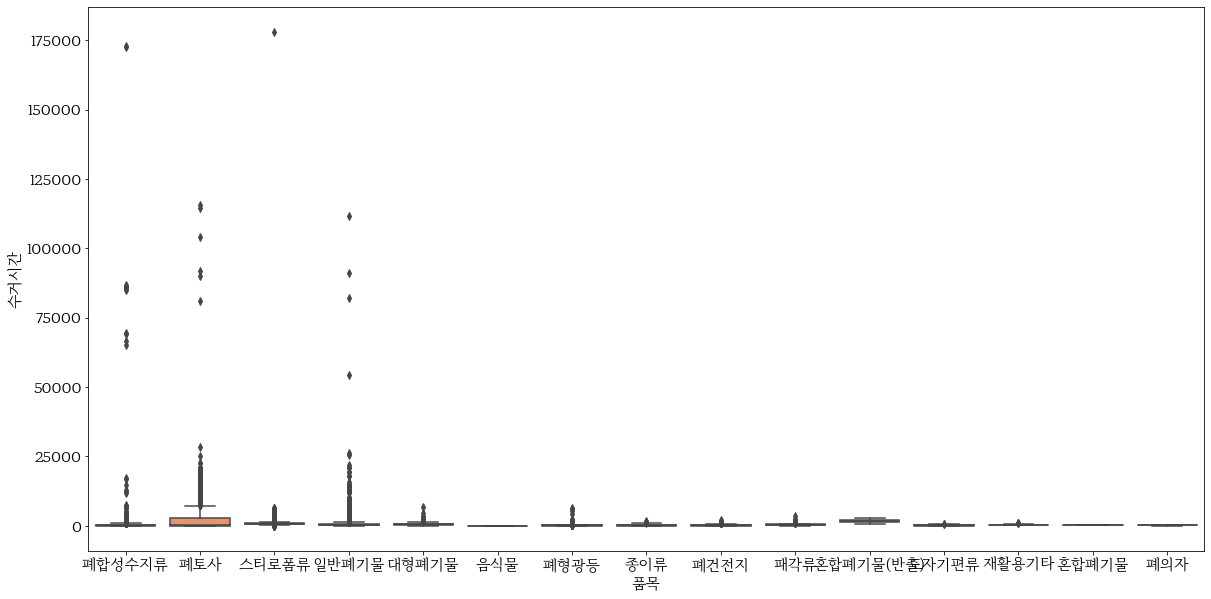

In [736]:
# Boxplot
## size
plt.figure(figsize=(20, 10))           ## figure size 변경
plt.rc('font',size=15)                 ## font size 변경

# box plot
sns.boxplot(x='품목',y='수거시간',data=df_20_v5)
plt.show()

In [745]:
# Category 수정 (2020년)
category = ['일반폐기물','음식물','종이류','폐합성수지류','스티로폼류','대형폐기물','폐건전지','폐형광등','재활용기타','EPR(필름류)',
           '폐토사','도자기편류','패각류']

cate_dict02 = {'생활쓰레기':'일반폐기물','폐기물':'일반폐기물','폐의약품':'일반폐기물','음식물':'음식물','종이팩':'종이류','폐합성':'폐합성수지류',
            '스티로폼':'스티로폼류','가전제품':'대형폐기물','폐매트리스':'대형폐기물','폐가구':'대형폐기물','쇼파':'대형폐기물','폐건전지':'폐건전지',
            '형광등':'폐형광등','형광등 반입':'폐형광등','재활용':'재활용기타','EPF(필름류)':'EPR(필름류)','연탄재':'폐토사','폐토사':'폐토사','페토사':'폐토사',
            '진공토':'폐토사','도자기편류':'도자기편류','패각류':'패각류', '폐의자':'대형폐기물', '혼합폐기물':'일반폐기물'}

# 새로운 카테고리 적용
for cate_name in list(cate_dict02.keys()) :
    df_20_v5 = df_20_v5.replace(cate_name,cate_dict02[cate_name])
df_20_v5.head(5)

# 혼합폐기물(반출) 삭제
df_20_v5 = df_20_v5[df_20_v5['품목'] != '혼합폐기물(반출)']
df_20_v5.head(5)

,계량일,상차시각,수거시간,거래처,차량번호,품목,실중량
0,2020-01-01,15:38,0,동탄출장소,279,폐합성수지류,1590
1,2020-01-02,9:57,1500,반월동,9184,폐합성수지류,300
2,2020-01-02,10:04,120,병점2동,8544,폐합성수지류,20
3,2020-01-02,10:10,300,정남면,9144,폐합성수지류,590
4,2020-01-02,10:11,240,기배동,7934,폐합성수지류,360


&nbsp;  
#### STEP 2 &nbsp; : &nbsp; Outlier 제거 함수 설정 및 적용

In [746]:
# outlier delete
# del_outlier(data, case, column)
## category == 전체 품목 list

for ct_name in category :
    try :
        del_outlier(df_20_v5, ct_name, '수거시간')
        
    except :
        print(ct_name)
        continue

일반폐기물 의 이상치 개수는  809
음식물 의 이상치 개수는  0
종이류 의 이상치 개수는  3
폐합성수지류 의 이상치 개수는  200
스티로폼류 의 이상치 개수는  405
대형폐기물 의 이상치 개수는  23
폐건전지 의 이상치 개수는  14
폐형광등 의 이상치 개수는  68
재활용기타 의 이상치 개수는  0
EPR(필름류) 의 이상치 개수는  0
폐토사 의 이상치 개수는  132
도자기편류 의 이상치 개수는  0
패각류 의 이상치 개수는  10


- Stripplot

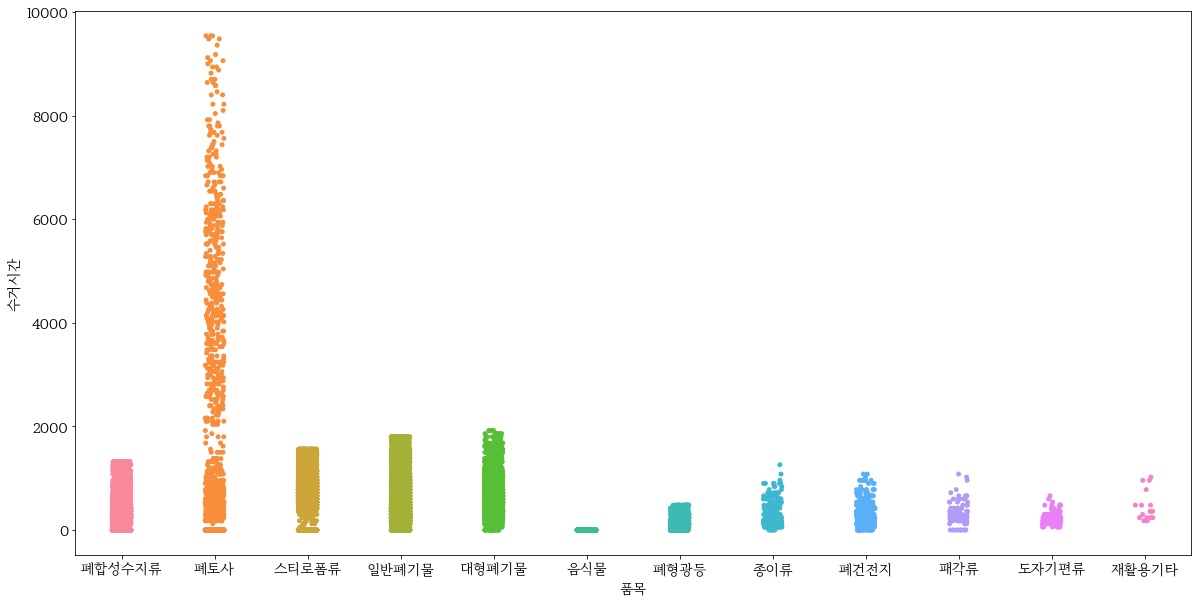

In [747]:
# Stripplot
## size
plt.figure(figsize=(20, 10))           ## figure size 변경
plt.rc('font',size=14)                 ## font size 변경

# seaborn color set
colr = sns.set_palette("GnBu_d")

# boxplot
sns.stripplot(x='품목',y='수거시간',data=df_20_v5 )
plt.show()

In [748]:
# csv save
df_20_v5.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_계근량(20)_v6.csv',
               encoding='ANSI', index=False)
df_20_bkv5 = df_20_v5.copy()
df_20_v5 = df_20_bkv5

---

&nbsp;  
#### 평균중량
- Pie chart 그릴 때 산출함

In [767]:
# csv save
df_19_sort.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_월별집계(19)_v5.csv',
               encoding='ANSI', index=False)
df_20_sort.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre4)/전체_월별집계(20)_v5.csv',
               encoding='ANSI', index=False)

&nbsp;  
#### Bar plot
- 2019년

In [824]:
# matplotlib 설정초기화
def pltconfig_default() :
    sns.reset_defaults()
    %matplotlib inline

pltconfig_default()

## 출처 : https://crazyj.tistory.com/170

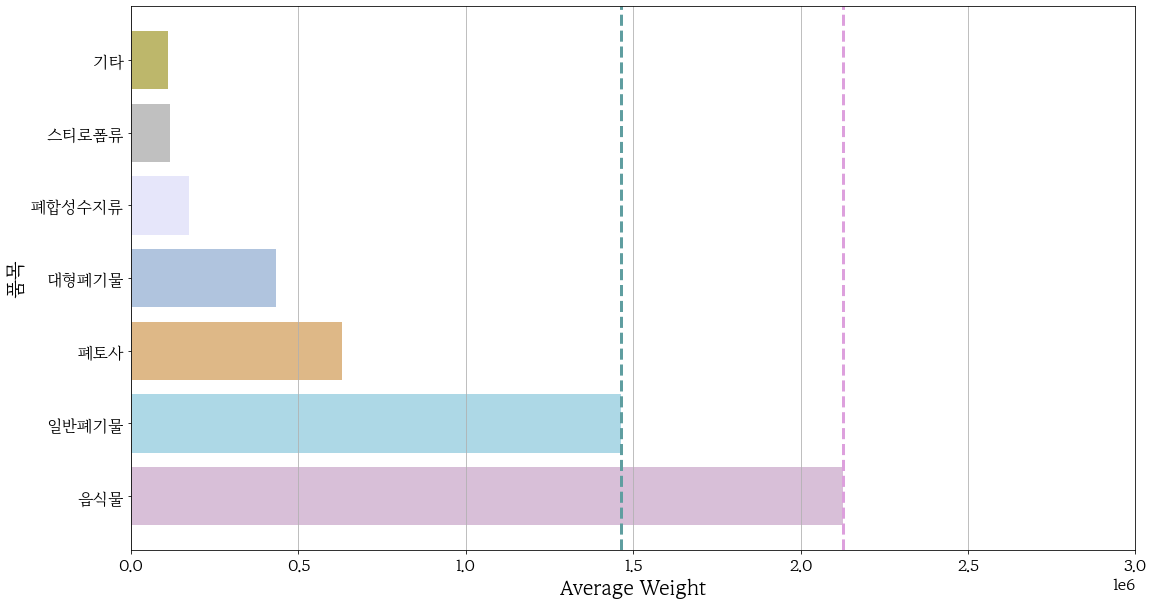

In [837]:
# 한글 시각화를 위한 준비
%matplotlib inline 
from matplotlib import font_manager, rc                                                         ## rc == run configure(configuration file)

font_name = font_manager.FontProperties(fname="C://Windows/Fonts/MARUBuriBetaR.ttf").get_name()
rc('font', family=font_name)

# size
plt.figure(figsize=(18, 10))           ## figure size 변경
plt.rc('font',size=16)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray']

# horizonal bar graph
used_category = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','기타']
aver_weight = np.array(df_19_sort['평균중량'])

plt.grid(True, axis = 'x')

plt.barh(used_category, aver_weight, color=colr)
plt.xlabel('Average Weight', fontsize=20)

plt.ylabel('품목', fontsize=20)
plt.xlim([0,3000000])

plt.axvline(x=2126486.6666666665, color='plum', linestyle='--', linewidth=3)   ## 2019년과 비교 '음식물' == '2126486.6666666665'
plt.axvline(x=1462641.6666666667, color='cadetblue', linestyle='--', linewidth=3)   ## 2019년과 비교 '일반폐기물' == '1462641.6666666667'

plt.show()

- 2020년

In [133]:
# 2019년 순서대로 바꾸기
df_20_sort['평균중량'][0], df_20_sort['평균중량'][1] = df_20_sort['평균중량'][1], df_20_sort['평균중량'][0]

In [134]:
df_20_sort['평균중량']

0      2.1687e+06
1     2.54215e+06
2          614991
3          280466
4          209864
5          132648
13        86491.2
Name: 평균중량, dtype: object

In [131]:
df_19_sort

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총중량,평균중량
0,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840,2.12649e+06
1,일반폐기물,15877,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,1467660,843210,1262690,2614240,17551700,1.46264e+06
2,폐토사,3004,494370,297220,690230,763680,862670,556330,632730,660640,634130,639860,699320,618310,7549490,629124
3,대형폐기물,5349,528440,520520,629910,524610,606760,256680,331510,682620,373010,317780,220520,193040,5185400,432117
4,폐합성수지류,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592,172966
5,스티로폼류,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060,115922
13,기타,3153,103200,69310,77360,82330,87710,300490,315170,82470,119420,57000,46870,49730,1.39106e+06,115922


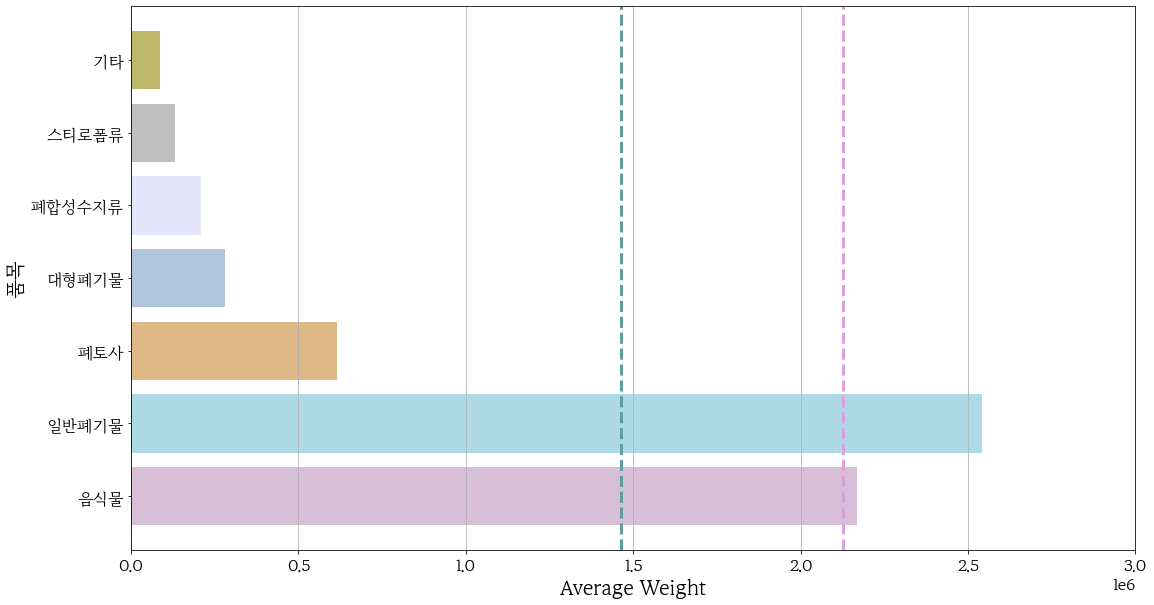

In [135]:
# size
plt.figure(figsize=(18, 10))           ## figure size 변경
plt.rc('font',size=16)                 ## font size 변경

# matplotlig css color
## 사용할 색상의 이름으로 list 생성
colr = ['thistle','lightblue','burlywood','lightsteelblue','lavender','silver','darkkhaki','darkgray']

# horizonal bar graph
used_category = ['음식물','일반폐기물','폐토사','대형폐기물','폐합성수지류','스티로폼류','기타']
aver_weight02 = np.array(df_20_sort['평균중량'])

plt.grid(True, axis = 'x')

plt.barh(used_category, aver_weight02, color=colr)
plt.xlabel('Average Weight', fontsize=20)
plt.ylabel('품목', fontsize=20)
plt.xlim([0,3000000])

plt.axvline(x=2126486.6666666665, color='plum', linestyle='--', linewidth=3)   ## 2019년과 비교 '음식물' == '2126486.6666666665'
plt.axvline(x=1462641.6666666667, color='cadetblue', linestyle='--', linewidth=3)   ## 2019년과 비교 '일반폐기물' == '1462641.6666666667'

plt.show()

---

&nbsp;  
#### 평균시간
- 2019년

In [778]:
#  Sol2 : 월별 총 수거시간 집계

df_19_H = pd.DataFrame(columns=
                             ['Name','Count','Time_1','Time_2','Time_3','Time_4','Time_5','Time_6','Time_7',
                              'Time_8','Time_9','Time_10','Time_11','Time_12','Time_sum'])

for trash in category :
    df_mid = {'Name':trash,'Count':len(df_19_v5[df_19_v5['품목']==trash]),
              'Time_1':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==1)]['실중량'].sum(axis=0),
              'Time_2':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==2)]['실중량'].sum(axis=0),
              'Time_3':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==3)]['실중량'].sum(axis=0),
              'Time_4':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==4)]['실중량'].sum(axis=0),
              'Time_5':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==5)]['실중량'].sum(axis=0),
              'Time_6':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==6)]['실중량'].sum(axis=0),
              'Time_7':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==7)]['실중량'].sum(axis=0),
              'Time_8':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==8)]['실중량'].sum(axis=0),
              'Time_9':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==9)]['실중량'].sum(axis=0),
              'Time_10':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==10)]['실중량'].sum(axis=0),
              'Time_11':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==11)]['실중량'].sum(axis=0),
              'Time_12':df_19_v5[(df_19_v5['품목']==trash)&(df_19_v5['계량일'].dt.month==12)]['실중량'].sum(axis=0),
              'Time_sum':df_19_v5[df_19_v5['품목']==trash]['실중량'].sum()}
    
    df_mid = pd.DataFrame(df_mid, index=[0])
    df_19_H = pd.concat([df_19_H, df_mid], ignore_index=True)
    df_mid = []

df_19_H.columns = ['품목','수거횟수','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','총수거시간']

# # csv save
# df_19_sketch01.to_csv('C:/Users/User/Desktop/화성시(20201211~)/분석자료(pre3)/전체_월별집계(19).csv',
#                encoding='ANSI', index=False)

df_19_H.head(5)

,품목,수거횟수,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,총수거시간
0,일반폐기물,15877,678800,1383960,1011190,1316750,2373200,1010480,1394950,2194570,1467660,843210,1262690,2614240,17551700
1,음식물,5273,2132700,2071510,2093600,2223940,2440230,1068120,1540260,2601090,2559080,2274060,2357950,2155300,25517840
2,종이류,270,3050,2610,2650,2950,3790,1230,5250,5000,7200,3220,4010,3900,44860
3,폐합성수지류,5397,138200,149530,180210,165230,147140,226472,238500,152190,165770,161980,177790,172580,2075592
4,스티로폼류,11824,131310,129110,122340,130580,136910,55100,71110,127750,138780,114160,114820,119090,1391060


In [783]:
# 평균수거시간집계
df_19_H['평균수거시간']=df_19_H.apply(lambda x : x['총수거시간'] / x['수거횟수'] if x['수거횟수'] !=0 else '0', axis=1)
df_19_H

&nbsp;  
- 수거시간이 제대로 입력되지 않음 == 평균 수거시간 집계를 통한 폐기물 수거복잡도 산출 불가능
&nbsp;  
---